# Kickstarter Project Analysis 

Import the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Merge all the datasets

In [144]:
kick1 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter001.csv')
kick2 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter002.csv')
kick3 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter003.csv')
kick4 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter004.csv')
kick5 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter005.csv')
kick6 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter006.csv')
kick7 = pd.read_csv('/Users/tj/Downloads/Kickstarter_Real_dataset/Kickstarter007.csv')

In [145]:
df = pd.concat([kick1,kick2,kick3,kick4,kick5,kick6,kick7]).reset_index()
df

index  backers_count  \
0          0              6   
1          1             13   
2          2             65   
3          3             19   
4          4             62   
...      ...            ...   
23831   1837            256   
23832   1838              7   
23833   1839            829   
23834   1840              2   
23835   1841            277   

                                                   blurb  \
0      The Outsiders are a band of Disabled adults fr...   
1      I have always dreamt of writing my own songs f...   
2      After 13 years of writing, recording and perfo...   
3      After the success of I Was There (Where Were Y...   
4      I'm excited to make "Gravity" come to life in ...   
...                                                  ...   
23831  A special book about collaborative projects fr...   
23832  Turning this old work shed into an outdoor, sc...   
23833  A multi-functional metallic ruler with leather...   
23834  we invented a backpack for everday commute. tr...   
23835  The fourth monograph of Bern-based and interna...   

                                                category  \
0      {"id":42,"name":"Pop","analytics_name":"Pop","...   
1      {"id":42,"name":"Pop","analytics_name":"Pop","...   
2      {"id":42,"name":"Pop","analytics_name":"Pop","...   
3      {"id":42,"name":"Pop","analytics_name":"Pop","...   
4      {"id":42,"name":"Pop","analytics_name":"Pop","...   
...                                                  ...   
23831  {"id":27,"name":"Graphic Design","analytics_na...   
23832  {"id":258,"name":"Architecture","analytics_nam...   
23833  {"id":28,"name":"Product Design","analytics_na...   
23834  {"id":28,"name":"Product Design","analytics_na...   
23835  {"id":27,"name":"Graphic Design","analytics_na...   

       converted_pledged_amount country country_displayable_name  created_at  \
0                          1242      GB       the United Kingdom  1406192480   
1                           838      GB       the United Kingdom  1405511622   
2                          8610      US        the United States  1404232795   
3                           892      GB       the United Kingdom  1405417218   
4                          5311      US        the United States  1403822173   
...                         ...     ...                      ...         ...   
23831                     14783      DE                  Germany  1607014316   
23832                       466      US        the United States  1612291859   
23833                     65800      HK                Hong Kong  1607319483   
23834                        93      JP                    Japan  1611227376   
23835                     24624      DE                  Germany  1611671646   

                                                 creator currency  ...  \
0      {"id":569891151,"name":"Jonathan Milner","is_r...      GBP  ...   
1      {"id":17555616,"name":"George Jazz Man Hollida...      GBP  ...   
2      {"id":1666850648,"name":"Mindy McQ","slug":"mi...      USD  ...   
3      {"id":1373754370,"name":"Gareth Moss","is_regi...      GBP  ...   
4      {"id":1495271198,"name":"Lizzy Small","slug":"...      USD  ...   
...                                                  ...      ...  ...   
23831  {"id":103910240,"name":"C24","slug":"collide24...      EUR  ...   
23832  {"id":668829529,"name":"Abigail Wildes","is_re...      USD  ...   
23833  {"id":669256128,"name":"Yuan Design Studio","s...      HKD  ...   
23834  {"id":1971547708,"name":"Everything inc","slug...      JPY  ...   
23835  {"id":1746968649,"name":"Slanted Publishers","...      EUR  ...   

                                              source_url  spotlight  \
0      https://www.kickstarter.com/discover/categorie...       True   
1      https://www.kickstarter.com/discover/categorie...       True   
2      https://www.kickstarter.com/discover/categorie...       True   
3      https://www.kickstarter.com/discover/categorie...  

Find the duplicate data

In [146]:
df1 = df['id'].value_counts().reset_index()
df1

index  id
0       927882654   2
1      1973609977   2
2       168885321   2
3       618265474   2
4        11391525   2
...           ...  ..
23355  1080879519   1
23356   542654186   1
23357  1505827979   1
23358   898841003   1
23359    77941940   1

[23360 rows x 2 columns]

Drop the duplicated project id that have count more than 1

In [147]:
df1 = df1[df1['id']==1]

In [148]:
df1 = df1.rename(columns = {'index':'id', 'id':'freq'})

Use inner join to merge with the original dataset by keeping only the unique values

In [149]:
df = pd.merge(df1,df, how = 'inner', left_on = 'id', right_on = 'id')

## Feature Engineering 

Convert Epoch Time for all the date field to Normal Date

In [150]:
df['created_at_date'] = pd.to_datetime(df['created_at'],unit='s')
df['launched_at_date'] = pd.to_datetime(df['launched_at'],unit='s')
df['deadline_date'] = pd.to_datetime(df['deadline'],unit='s')
df['state_changed_at_date'] = pd.to_datetime(df['state_changed_at'],unit='s')

Create new category field

In [151]:
df['project_category'] = df['category'].apply(lambda x: x.split(",")[1][8:-1])

Create new duration field by week and day

In [152]:
df['day_duration'] = (df['deadline_date'] - df['launched_at_date'])/np.timedelta64(1,'D')
df['week_duration'] = (df['deadline_date'] - df['launched_at_date'])/np.timedelta64(1,'W')

Create month and year field

In [153]:
df['month'] = df['launched_at_date'].dt.month
df['year'] = df['launched_at_date'].dt.year

Final dataset after all feature engineering

Noted: We also remove several fields that is not meaningful in our analysis

In [154]:
new_df = df[['backers_count','id','name','project_category','country','created_at_date','launched_at_date','deadline_date','day_duration','week_duration','state_changed_at_date','month','year','goal','is_starrable','pledged','spotlight','staff_pick','state']]

In [155]:
new_df['state'].value_counts()

successful    14490
failed         7092
canceled        695
live            607
Name: state, dtype: int64

Find the null values

In [156]:
missing = new_df.isnull().sum()
missing

backers_count            0
id                       0
name                     0
project_category         0
country                  0
created_at_date          0
launched_at_date         0
deadline_date            0
day_duration             0
week_duration            0
state_changed_at_date    0
month                    0
year                     0
goal                     0
is_starrable             0
pledged                  0
spotlight                0
staff_pick               0
state                    0
dtype: int64

Include only successful and failed state since this is two values that we want to predict

In [163]:
new_df = new_df[(new_df['state']=='successful')|(new_df['state']=='failed')|(new_df['state']=='canceled')]

<AxesSubplot:xlabel='backers_count', ylabel='Count'>

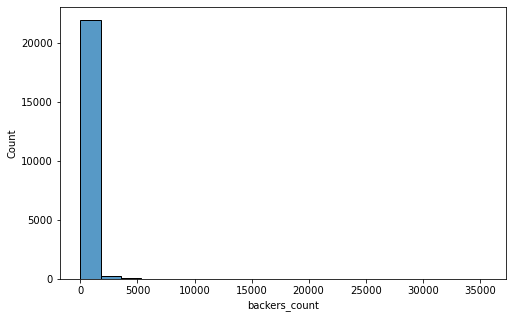

In [164]:
plt.figure(figsize = (8,5))
sns.histplot(data= new_df['backers_count'], bins = 20)

<AxesSubplot:xlabel='backers_count'>

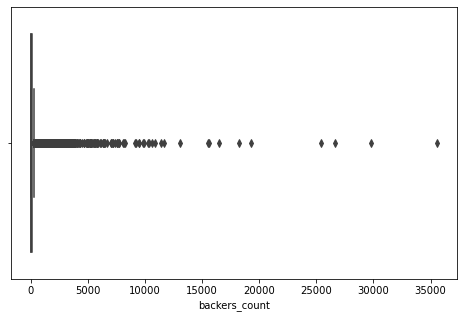

In [135]:
plt.figure(figsize = (8,5))
sns.boxplot(data= new_df, x = 'backers_count')

## Correlation Matrix

Create subset dataset for correlation matrix by including only numerical variables

In [136]:
subset_df = new_df[['backers_count','day_duration','week_duration','goal','pledged']]

Compute the correlation matrix

In [19]:
corr = subset_df.corr()

In [20]:
print(corr)

               backers_count  day_duration  week_duration      goal   pledged
backers_count       1.000000      0.011824       0.011824 -0.000720  0.265347
day_duration        0.011824      1.000000       1.000000  0.008841  0.037055
week_duration       0.011824      1.000000       1.000000  0.008841  0.037055
goal               -0.000720      0.008841       0.008841  1.000000  0.041204
pledged             0.265347      0.037055       0.037055  0.041204  1.000000


<AxesSubplot:xlabel='pledged'>

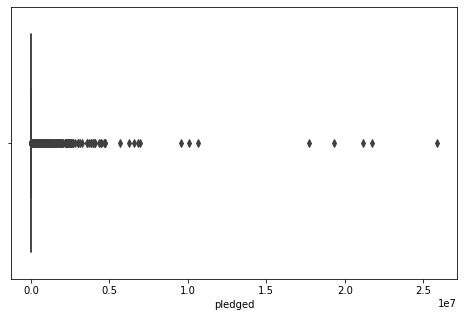

In [21]:
plt.figure(figsize = (8,5))
sns.boxplot(data= subset_df, x = 'pledged')

Find the boundary to remove the outlier for pledged 

In [22]:
print("Highest allowed",subset_df['pledged'].mean() + 3*subset_df['pledged'].std())
print("Lowest allowed",subset_df['pledged'].mean() - 3*subset_df['pledged'].std())

Highest allowed 1208551.3671053762
Lowest allowed -1141401.691298939


In [157]:
subset_df = subset_df[(subset_df['pledged'] < 1182907) & (subset_df['pledged'] > -1116293)]

Find the boundary to remove the outlier for goal

In [158]:
print("Highest allowed",subset_df['goal'].mean() + 3*subset_df['goal'].std())
print("Lowest allowed",subset_df['goal'].mean() - 3*subset_df['goal'].std())

Highest allowed 2793961.423689074
Lowest allowed -2711323.874787762


In [159]:
subset_df = subset_df[(subset_df['goal'] < 2737746) & (subset_df['goal'] > -2651305)]

Compute the correlation matrix after removing the outlier

In [26]:
corr = subset_df.corr()

In [27]:
print(corr)

               backers_count  day_duration  week_duration      goal   pledged
backers_count       1.000000     -0.000591      -0.000591  0.022696  0.571595
day_duration       -0.000591      1.000000       1.000000  0.082524  0.022644
week_duration      -0.000591      1.000000       1.000000  0.082524  0.022644
goal                0.022696      0.082524       0.082524  1.000000  0.167069
pledged             0.571595      0.022644       0.022644  0.167069  1.000000


<AxesSubplot:>

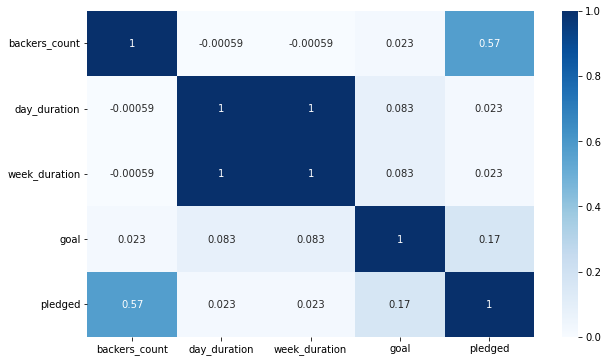

In [28]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,cmap="Blues",annot=True)

<AxesSubplot:xlabel='state', ylabel='count'>

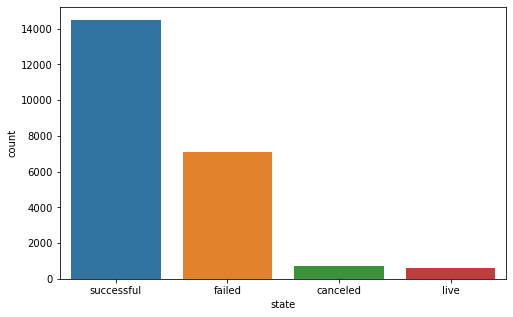

In [160]:
plt.figure(figsize = (8,5))
sns.countplot(x='state', data = new_df, order = new_df['state'].value_counts().index)

Top 10 kickstart project categories

In [30]:
cat = new_df['project_category'].value_counts().reset_index()
cat = cat.sort_values(by = 'project_category', ascending = False).head(10)
cat.rename(columns={'index':'category','project_category':'count'},inplace=True)

<AxesSubplot:xlabel='count', ylabel='category'>

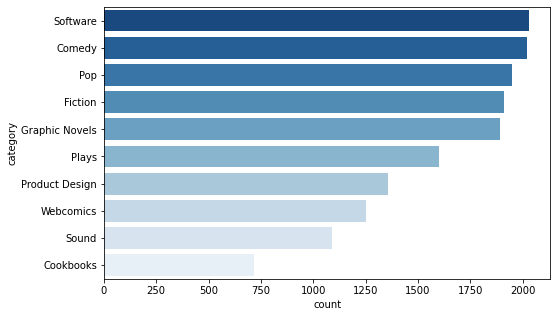

In [31]:
plt.figure(figsize = (8,5))
sns.barplot(x= 'count',y='category',data = cat, palette = "Blues_r")

In [32]:
df['project_category'].value_counts().head(10)

Software          2052
Comedy            2040
Fiction           1956
Pop               1956
Graphic Novels    1932
Plays             1608
Product Design    1600
Webcomics         1260
Sound             1099
Cookbooks          718
Name: project_category, dtype: int64

Top 10 Projects by country

<AxesSubplot:xlabel='country', ylabel='count'>

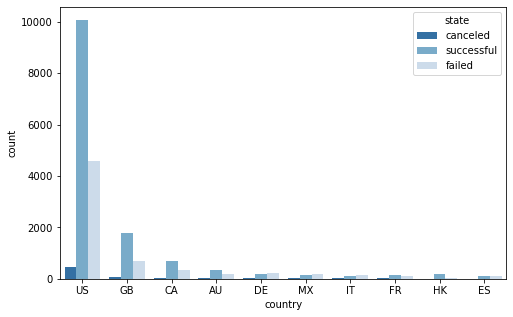

In [33]:
plt.figure(figsize = (8,5))
top_10_countries = new_df['country'].value_counts().nlargest(10).index
sns.countplot(x='country',data = new_df, hue = 'state', palette = "Blues_r",order = top_10_countries)

Analyze the amount of projects by year

<AxesSubplot:xlabel='year', ylabel='count'>

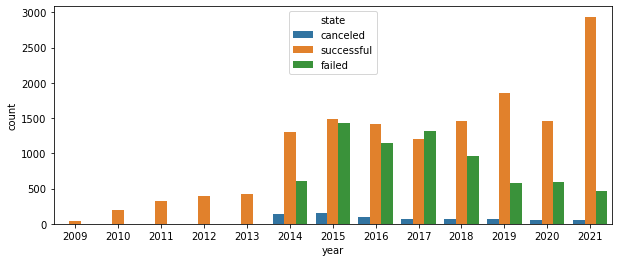

In [34]:
plt.figure(figsize = (10,4))
sns.countplot(x='year',data = new_df, hue = 'state')

<AxesSubplot:xlabel='week_duration'>

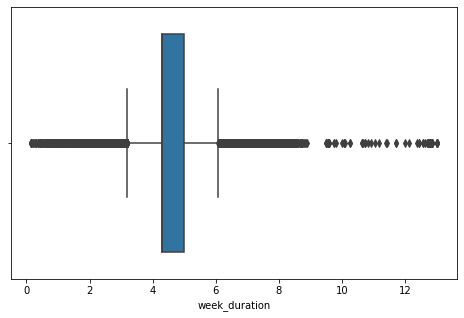

In [35]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'week_duration', data = new_df)

<Figure size 576x360 with 0 Axes>

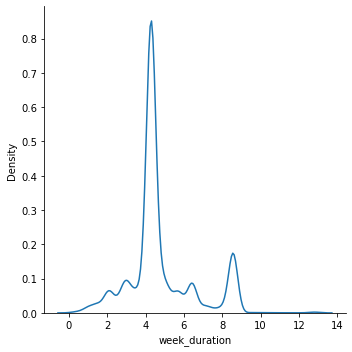

In [36]:
plt.figure(figsize = (8,5))
sns.displot(x='week_duration', data = new_df,kind='kde')

<AxesSubplot:xlabel='year'>

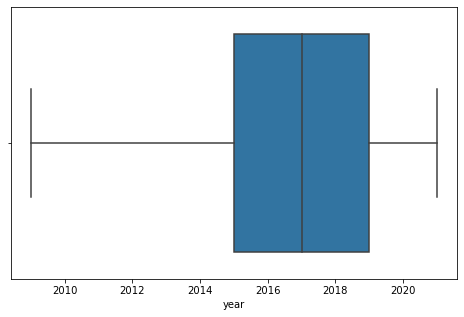

In [37]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'year', data = new_df)

<Figure size 576x360 with 0 Axes>

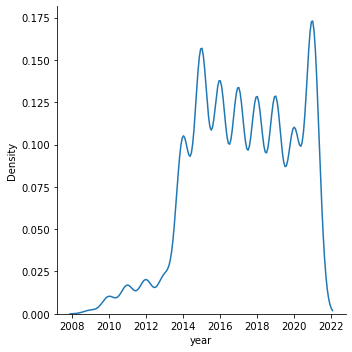

In [38]:
plt.figure(figsize = (8,5))
sns.displot(x='year', data = new_df,kind='kde')

# Data Analysis

Create subset data for named tree_df for the decision tree classification

In [165]:
tree_df = new_df[['backers_count','project_category','year','day_duration','goal','pledged','spotlight','staff_pick','state']]

In [166]:
tree_df

backers_count project_category  year  day_duration      goal   pledged  \
0                  1            Audio  2020     60.000000     200.0       1.0   
1                  0        Cookbooks  2014     30.000000    5000.0       0.0   
2                 27          Fiction  2021     60.000000    1500.0    1697.0   
3                179          Fiction  2021     30.000000    1500.0   13675.0   
4                  3            Sound  2015     30.000000  125000.0       3.0   
...              ...              ...   ...           ...       ...       ...   
22875            102            Sound  2021     31.164329   30000.0   40693.0   
22876           1017            Sound  2021     40.000000    5000.0  112677.0   
22877             70            Sound  2021     30.000000   20000.0   40243.0   
22878            814            Sound  2021     30.000000   50000.0  431693.0   
22883            277   Graphic Design  2021     51.252824   16800.0   20691.5   

       spotlight  staff_pick       state  
0          False       False    canceled  
1          False       False    canceled  
2           True       False  successful  
3           True        True  successful  
4          False       False      failed  
...          ...         ...         ...  
22875       True       False  successful  
22876       True       False  successful  
22877       True       False  successful  
22878       True       False  successful  
22883       True        True  successful  

[22277 rows x 9 columns]

### Label Encoding for Project Cateogory

In [171]:
data = pd.get_dummies(tree_df, columns=["project_category","year"], prefix=["project_category","year"], prefix_sep="_")
data['state'] = data['state'].replace({'successful':1,'failed':0,'canceled':2})

### Encoding Binary columns

In [172]:
columns_to_encode = ["spotlight", "staff_pick"]
for column in columns_to_encode:
    data[column].replace({True: 1, False: 0}, inplace=True)

In [43]:
data

backers_count  day_duration      goal   pledged  spotlight  staff_pick  \
0                  1     60.000000     200.0       1.0          0           0   
1                  0     30.000000    5000.0       0.0          0           0   
2                 27     60.000000    1500.0    1697.0          1           0   
3                179     30.000000    1500.0   13675.0          1           1   
4                  3     30.000000  125000.0       3.0          0           0   
...              ...           ...       ...       ...        ...         ...   
22875            102     31.164329   30000.0   40693.0          1           0   
22876           1017     40.000000    5000.0  112677.0          1           0   
22877             70     30.000000   20000.0   40243.0          1           0   
22878            814     30.000000   50000.0  431693.0          1           0   
22883            277     51.252824   16800.0   20691.5          1           1   

       state  project_category_Architecture  project_category_Audio  \
0          2                              0                       1   
1          2                              0                       0   
2          1                              0                       0   
3          1                              0                       0   
4          0                              0                       0   
...      ...                            ...                     ...   
22875      1                              0                       0   
22876      1                              0                       0   
22877      1                              0                       0   
22878      1                              0                       0   
22883      1                              0                       0   

       project_category_Bacon  ...  year_2012  year_2013  year_2014  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          0          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   
...                       ...  ...        ...        ...        ...   
22875                       0  ...          0          0          0   
22876                       0  ...          0          0          0   
22877                       0  ...          0          0          0   
22878                       0  ...          0          0          0   
22883                       0  ...          0          0          0   

       year_2015  year_2016  year_2017  year_2018  year_2019  year_2020  \
0              0          0          0          0          0          1   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
22875          0          0          0          0          0          0   
22876          0          0          0          0          0          0   
22877          0          0          0          0          0          0   
22878          0          0          0          0          0          0   
22883          0          0          0          0          0          0   

       year_2021  
0              0  
1              0  
2              1  
3              1  
4              0  
...          ...  
22875          1  
22876          1  
22877          1  
22878          1  
22883          1  

[22277 rows x 60 columns]

In [44]:
corr = data.corr()
corr

backers_count  day_duration      goal  \
backers_count                             1.000000      0.011824 -0.000720   
day_duration                              0.011824      1.000000  0.008841   
goal                                     -0.000720      0.008841  1.000000   
pledged                                   0.265347      0.037055  0.041204   
spotlight                                 0.164346     -0.171736 -0.044111   
staff_pick                                0.216237     -0.056488 -0.007917   
state                                     0.125719     -0.116124 -0.035554   
project_category_Architecture             0.002622     -0.005394  0.000091   
project_category_Audio                   -0.026157      0.004153 -0.002945   
project_category_Bacon                   -0.020080      0.003567 -0.001623   
project_category_Civic Design             0.001496      0.006971 -0.000166   
project_category_Comedy                  -0.027772     -0.035269 -0.000471   
project_category_Community Gardens       -0.027307      0.039686  0.007514   
project_category_Cookbooks               -0.017978      0.012030 -0.002790   
project_category_Design                   0.029449     -0.033752 -0.002299   
project_category_Drinks                   0.004295      0.008689 -0.003483   
project_category_Events                  -0.001568      0.005844 -0.000916   
project_category_Farmer's Markets        -0.000164      0.016693 -0.000787   
project_category_Farms                   -0.004224      0.001678 -0.001787   
project_category_Fiction                 -0.016434     -0.070474 -0.013152   
project_category_Food                     0.045427     -0.001739 -0.003750   
project_category_Food Trucks             -0.004070     -0.003272 -0.001688   
project_category_Graphic Design           0.021538     -0.016942 -0.000799   
project_category_Graphic Novels           0.046731     -0.075118 -0.011988   
project_category_Interactive Design       0.005219     -0.002844 -0.000552   
project_category_Journalism              -0.011772      0.036971 -0.003908   
project_category_Letterpress             -0.005530     -0.009380 -0.002419   
project_category_Literary Journals       -0.015546      0.006647 -0.004350   
project_category_Literary Spaces         -0.005608      0.022443 -0.000903   
project_category_Photo                   -0.019069      0.001638 -0.002356   
project_category_Plays                   -0.051675     -0.037935 -0.009324   
project_category_Pop                     -0.037961      0.039353 -0.007571   
project_category_Print                   -0.014812      0.019067 -0.003999   
project_category_Product Design           0.156192     -0.008995 -0.003877   
project_category_Punk                    -0.024103      0.034959 -0.004496   
project_category_R&B                     -0.035651      0.018696 -0.006079   
project_category_Restaurants              0.007275     -0.003093 -0.000138   
project_category_Small Batch             -0.004482     -0.002887 -0.003264   
project_category_Software                -0.024552      0.065928  0.054368   
project_category_Sound                    0.049388      0.023342  0.007811   
project_category_Spaces                  -0.011519      0.021832  0.021009   
project_category_Toys                     0.028929     -0.013207 -0.000761   
project_category_Typography               0.000003     -0.009518 -0.000413   
project_category_Vegan                    0.005476     -0.000020 -0.002416   
project_category_Video                   -0.015711      0.009913  0.004841   
project_category_Web                     -0.019736      0.038196 -0.001687   
project_category_Webcomics                0.025911     -0.017975 -0.006759   
year_2009                                -0.006471      0.077121 -0.001882   
year_2010                                -0.007814      0.098906 -0.004132   
year_2011                                -0.013182      0.042095 -0.005102   
year_2012                                -0.000601     -0.0

# Perform the Decision Tree Classification

### Splitting the Data

In [173]:
from sklearn.model_selection import train_test_split

#define the input and target variables 
X = data[data.columns.difference(['state'])]
y = data.state

#split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify=y)
X

backers_count  day_duration      goal   pledged  \
0                  1     60.000000     200.0       1.0   
1                  0     30.000000    5000.0       0.0   
2                 27     60.000000    1500.0    1697.0   
3                179     30.000000    1500.0   13675.0   
4                  3     30.000000  125000.0       3.0   
...              ...           ...       ...       ...   
22875            102     31.164329   30000.0   40693.0   
22876           1017     40.000000    5000.0  112677.0   
22877             70     30.000000   20000.0   40243.0   
22878            814     30.000000   50000.0  431693.0   
22883            277     51.252824   16800.0   20691.5   

       project_category_Architecture  project_category_Audio  \
0                                  0                       1   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
22875                              0                       0   
22876                              0                       0   
22877                              0                       0   
22878                              0                       0   
22883                              0                       0   

       project_category_Bacon  project_category_Civic Design  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   
...                       ...                            ...   
22875                       0                              0   
22876                       0                              0   
22877                       0                              0   
22878                       0                              0   
22883                       0                              0   

       project_category_Comedy  project_category_Community Gardens  ...  \
0                            0                                   0  ...   
1                            0                                   0  ...   
2                            0                                   0  ...   
3                            0                                   0  ...   
4                            0                                   0  ...   
...                        ...                                 ...  ...   
22875                        0                                   0  ...   
22876                        0                                   0  ...   
22877                        0                                   0  ...   
22878                        0                                   0  ...   
22883                        0                                   0  ...   

       year_2012  year_2013  year_2014  year_2015  year_2016  year_2017  \
0              0          0          0          0          0          0   
1              0          0          1          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          1          0          0   
...          ...        ...        ...        ...        ...        ...   
22875          0          0          0          0          0          0   
22876          0          0          0          0          0          0   
22877          0          0          0          0          0          0   
22878          0          0          0          0          0          0   
22883          0          0          0        

### Fitting the decision tree classifier

In [216]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#define classification algorithm
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X_train, y_train)

y_pred_tree = clf_tree.predict(X_test)

### Plotting the decision tree

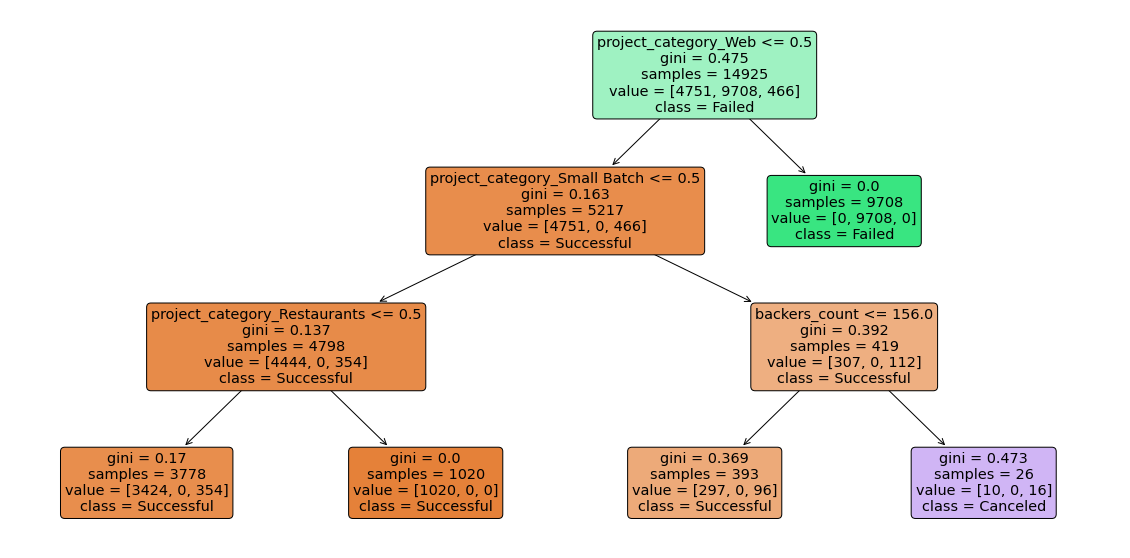

In [175]:
#plotting the decision tree
cols = data.columns
feature_names = cols[~cols.isin(['state'])].to_list()
class_names = ['Successful','Failed','Canceled']
plt.figure(figsize=(20,10))
tree.plot_tree(clf_tree, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

### Evaluate the Performance

Confusion Matrix

[[2334    0    7]
 [   0 4782    0]
 [ 226    0    3]]


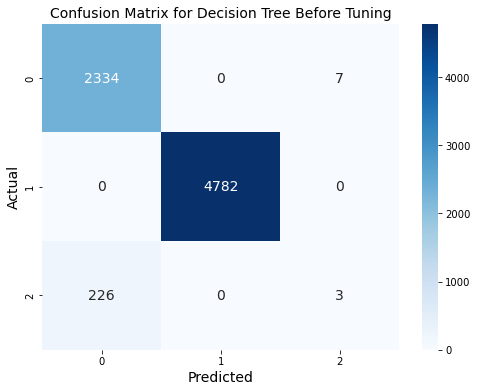

In [176]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_tree)
print(confusion_mat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree Before Tuning', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2570
           1       1.00      1.00      1.00      4782

    accuracy                           1.00      7352
   macro avg       1.00      1.00      1.00      7352
weighted avg       1.00      1.00      1.00      7352



### Feature Importance

In [50]:
feature_imp_tree = pd.Series(clf_tree.feature_importances_, index = cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_tree

project_category_Web               0.992094
project_category_Small Batch       0.004593
project_category_Restaurants       0.002244
backers_count                      0.001069
project_category_Product Design    0.000000
project_category_Punk              0.000000
project_category_R&B               0.000000
project_category_Software          0.000000
project_category_Sound             0.000000
project_category_Spaces            0.000000
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


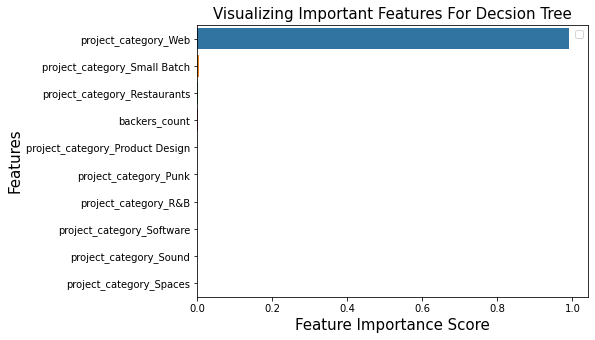

In [52]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_tree, y=feature_imp_tree.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Decsion Tree", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

# Create a GridSearchCV object
grid_search_tree = GridSearchCV(clf_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [3, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [55]:
df_cv_results_tree = pd.DataFrame(grid_search_tree.cv_results_)
df_cv_results_tree.sort_values(by = 'rank_test_score', inplace = True)
df_cv_results_tree[['param_max_depth','param_min_samples_leaf','param_min_samples_split','rank_test_score']]

param_max_depth param_min_samples_leaf param_min_samples_split  \
64              10                      1                       5   
66              10                      2                       2   
82              15                      1                       5   
83              15                      1                      10   
67              10                      2                       5   
..             ...                    ...                     ...   
24               3                      4                       2   
18               3                      1                       2   
10               3                      1                       5   
3                3                      2                       2   
15               3                      4                       2   

    rank_test_score  
64                1  
66                2  
82                3  
83                4  
67                5  
..              ...  
24              104  
18              105  
10              106  
3               107  
15              108  

[108 rows x 4 columns]

### Final Model

In [180]:
from sklearn import tree

#define classification algorithm
clf_tree_new = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split= 5)
clf_tree_new = clf_tree_new.fit(X_train, y_train)

y_pred_tree_new = clf_tree_new.predict(X_test)

### Plotting the Decision Tree

In [181]:
#plotting the decision tree
cols = data.columns
feature_names = cols[~cols.isin(['state'])].to_list()
class_names = ['Successful','Failed','Canceled']
plt.figure(figsize=(500,200))
tree.plot_tree(clf_tree_new, filled=True, rounded=True, class_names=class_names, feature_names=feature_names)
plt.show()

### Evaluate the Performance

[[2327    0   14]
 [   0 4782    0]
 [ 217    0   12]]


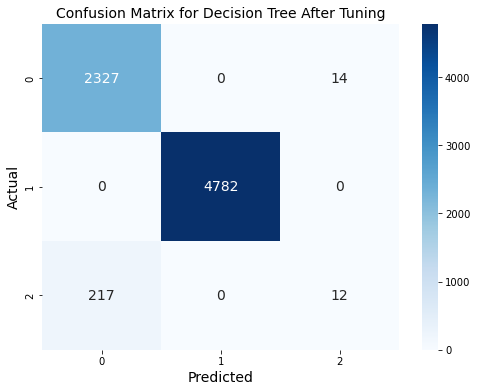

In [182]:
from sklearn.metrics import confusion_matrix
confusion_mat_new = confusion_matrix(y_test, y_pred_tree_new)
print(confusion_mat_new)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree After Tuning', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [229]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree_new))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.46      0.05      0.09       229

    accuracy                           0.97      7352
   macro avg       0.79      0.68      0.68      7352
weighted avg       0.96      0.97      0.96      7352



### ROC Plot for Decision Tree

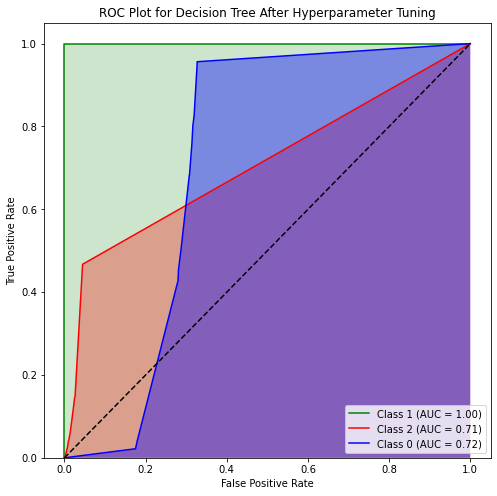

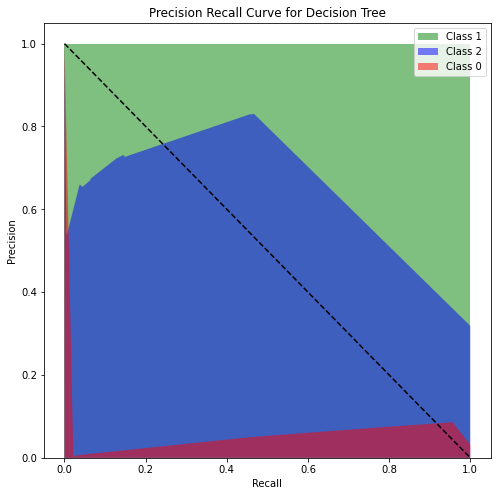

In [309]:
y_pred_proba_tree_new = clf_tree_new.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_proba_tree_new[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_proba_tree_new[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_proba_tree_new[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Decision Tree After Hyperparameter Tuning')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_proba_tree_new[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_proba_tree_new[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_proba_tree_new[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Decision Tree')
plt.show()

# Perform Random Forest Classification

### Fitting the Random Forest classifier

In [332]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
clf_rdm = RandomForestClassifier(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
clf_rdm = clf_rdm.fit(X_train, y_train)  

y_pred_rdm = clf_rdm.predict(X_test)

### Evaluate the Performance

[[2311    0   30]
 [   0 4782    0]
 [ 207    0   22]]


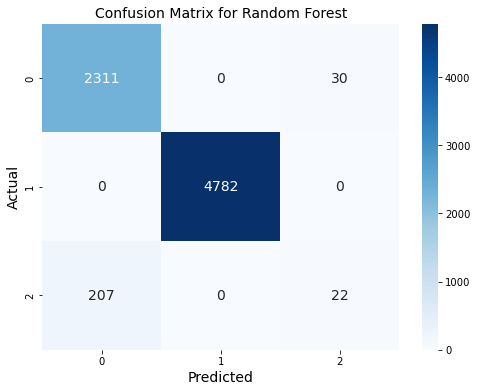

In [333]:
from sklearn.metrics import confusion_matrix
confusion_matrix_rdm = confusion_matrix(y_test, y_pred_rdm)
print(confusion_matrix_rdm)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rdm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for Random Forest', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [334]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rdm))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.42      0.10      0.16       229

    accuracy                           0.97      7352
   macro avg       0.78      0.69      0.70      7352
weighted avg       0.96      0.97      0.96      7352



### Features Importance

In [335]:
feature_imp_rdm = pd.Series(clf_rdm.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_rdm

project_category_Web                 0.453342
pledged                              0.169562
backers_count                        0.163043
goal                                 0.066612
day_duration                         0.027762
project_category_Restaurants         0.018021
project_category_Webcomics           0.014812
project_category_Farmer's Markets    0.012855
project_category_Food Trucks         0.006243
project_category_Small Batch         0.005824
dtype: float64

### Plot the Feature Importance

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


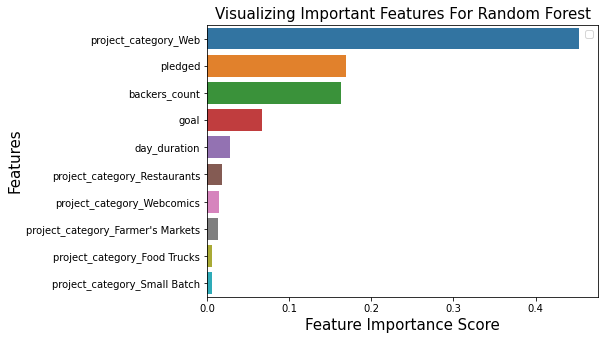

In [337]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_rdm, y=feature_imp_rdm.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For Random Forest", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Keeping Top 4 Features

In [338]:
#define the input and target variables 
X1 = data[['project_category_Web','pledged','backers_count','goal']]
y1 = data.state

#split training and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.33, random_state = 5, stratify=y)

### Fitting the Random Forest classifier on New Model

In [339]:
from sklearn.ensemble import RandomForestClassifier
  
clf_rdm_new = RandomForestClassifier(n_estimators = 100, random_state = 5)
  
clf_rdm_new = clf_rdm_new.fit(X1_train, y1_train)  

[[2279   31   31]
 [   0 4782    0]
 [ 213   15    1]]


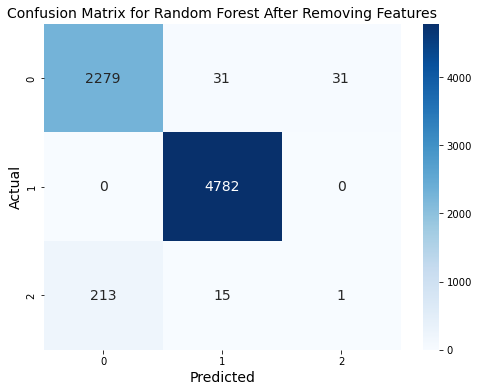

In [340]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_rdm_new = clf_rdm_new.predict(X1_test)

# Calculate the confusion matrix
conf_matrix_rdm_new = confusion_matrix(y1_test, y_pred_rdm_new)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_rdm_new)


# Create a heatmap
sns.heatmap(conf_matrix_rdm_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted',fontsize = 14)
plt.ylabel('Actual',fontsize = 14)
plt.title('Confusion Matrix for Random Forest After Removing Features',fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [341]:
from sklearn.metrics import classification_report
print(classification_report(y1_test, y_pred_rdm_new))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2341
           1       0.99      1.00      1.00      4782
           2       0.03      0.00      0.01       229

    accuracy                           0.96      7352
   macro avg       0.65      0.66      0.65      7352
weighted avg       0.94      0.96      0.95      7352



### ROC Plot for Random Forest

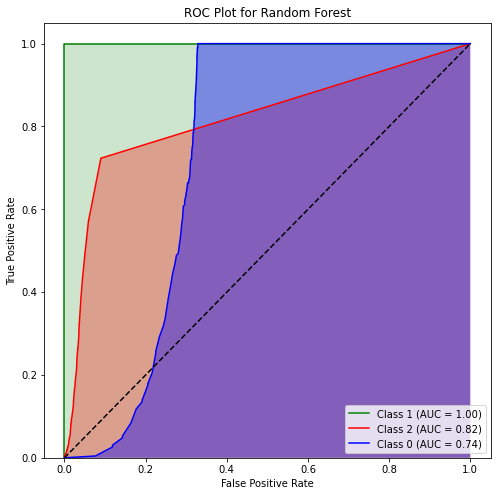

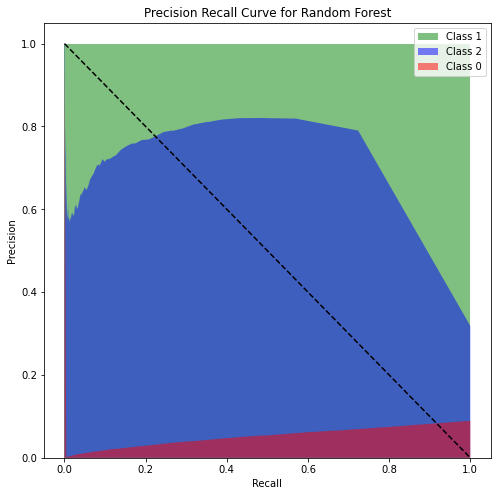

In [342]:
from sklearn.ensemble import RandomForestClassifier

# Predict class probabilities on the test data
y_pred_proba_rdm_new = clf_rdm.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_proba_rdm_new [:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_proba_rdm_new [:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_proba_rdm_new [:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Random Forest')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_proba_rdm_new [:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_proba_rdm_new [:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_proba_rdm_new [:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Random Forest')
plt.show()

# Perform Gradient Boosting Classification

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbm = GradientBoostingClassifier(n_estimators=1000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

clf_gbm.fit(X_train, y_train.values.ravel())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7141           0.0326           55.16s
         2           0.6981           0.0200           40.26s
         3           0.6940           0.0046           30.90s
         4           0.6865           0.0143           26.68s
         5           0.6369           0.0408           23.75s
         6           0.6250           0.0097           21.63s
         7           0.5976           0.0269           20.29s
         8           0.5897           0.0056           19.15s
         9           0.5732           0.0232           18.28s
        10           0.5430           0.0300           17.60s
        20           0.4064           0.0071           15.16s
        30           0.3393           0.0067           13.75s
        40           0.2827           0.0094           12.79s
        50           0.2389           0.0017           12.20s
        60           0.2102           0.0019           11.78s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=1000, n_iter_no_change=20,
                           subsample=0.5, verbose=1)

### Evaluate the Performance

[[2329    0   12]
 [   0 4782    0]
 [ 223    0    6]]


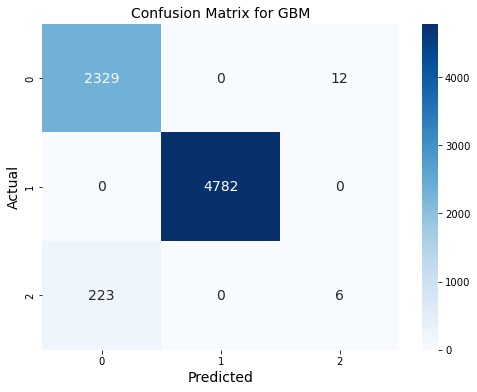

In [322]:
# Generate predictions
y_pred_gbm = clf_gbm.predict(X_test)

# Calculate the confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_gbm)

# Create a heatmap
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix for GBM', fontsize = 14)
# Show the plot
plt.show()

### Classification Report

In [323]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.33      0.03      0.05       229

    accuracy                           0.97      7352
   macro avg       0.75      0.67      0.67      7352
weighted avg       0.95      0.97      0.96      7352



### Features Importance

In [ ]:
feature_imp_gbm = pd.Series(clf_gbm.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_gbm

### Plot the Feature Importance

In [ ]:
sns.barplot(x=feature_imp_gbm, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Gradient Boosting")
plt.legend()
plt.show()

### Optimizing the Model by Keeping Top 4 Features

In [252]:
#define the input and target variables 
X2 = data[['project_category_Web','pledged','backers_count','goal']]
y2 = data.state

#split training and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33, random_state = 10, stratify=y)

### ROC Plot for Gradient Boosting Classifier

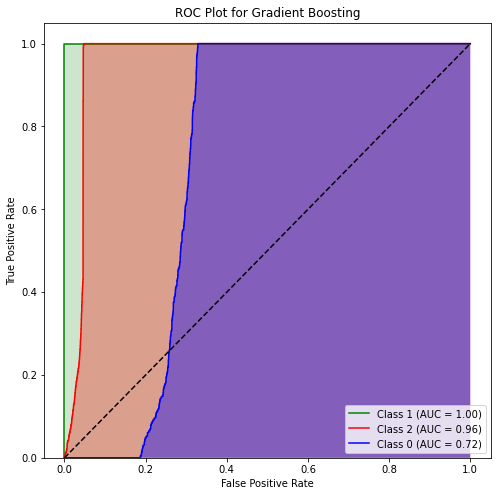

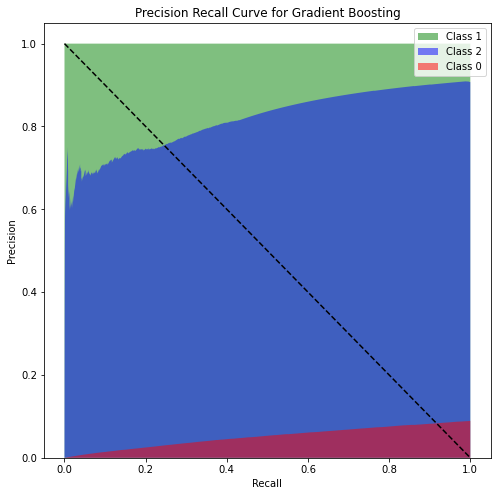

In [326]:
# Make predictions on the test data
y_pred_proba_gbm = clf_gbm.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_proba_gbm[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_proba_gbm[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_proba_gbm[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Gradient Boosting')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_proba_gbm[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_proba_gbm[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_proba_gbm[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Gradient Boosting')
plt.show()

### Fitting the Random Forest classifier on New Model

In [320]:
clf_gdm_new = GradientBoostingClassifier(n_estimators=1000,
                                       learning_rate=0.05,
                                       max_depth=3,
                                       subsample=0.5,
                                       validation_fraction=0.1,
                                       n_iter_no_change=20,
                                       max_features='log2',
                                       verbose=1)

clf_gdm_new = clf_gdm_new.fit(X2_train, y2_train) 

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.7086           0.0453           38.59s
         2           0.6716           0.0357           26.60s
         3           0.6396           0.0346           22.46s
         4           0.6108           0.0267           20.76s
         5           0.5700           0.0281           19.25s
         6           0.5522           0.0230           19.00s
         7           0.5298           0.0227           18.37s
         8           0.5169           0.0187           17.85s
         9           0.4913           0.0210           17.45s
        10           0.4710           0.0174           17.19s
        20           0.3582           0.0106           15.65s
        30           0.2887           0.0038           15.15s
        40           0.2430           0.0025           14.70s
        50           0.2233           0.0022           14.31s
        60           0.2070           0.0015           14.19s
       

[[2287   51    3]
 [   0 4782    0]
 [ 213   15    1]]


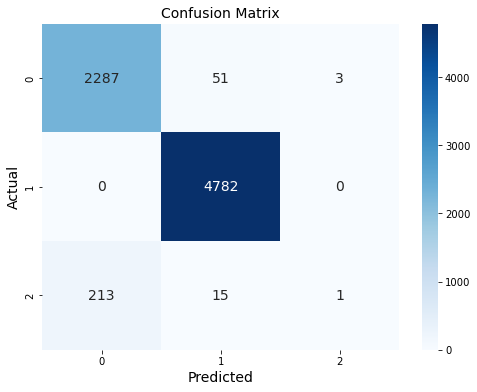

In [324]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_gdm_new = clf_gdm_new.predict(X2_test)

# Calculate the confusion matrix
conf_matrix_gdm_new = confusion_matrix(y2_test, y_pred_gdm_new)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_gdm_new)

# Create a heatmap
sns.heatmap(conf_matrix_gdm_new, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [325]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gdm_new))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      2341
           1       0.65      0.66      0.66      4782
           2       0.25      0.00      0.01       229

    accuracy                           0.54      7352
   macro avg       0.41      0.34      0.33      7352
weighted avg       0.54      0.54      0.54      7352



# Perform XGBoost Classification

In [266]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(objective = 'multi:softmax', 
                        eval_metric = 'merror',
                        learning_rate = 0.1, 
                        max_depth = 5, 
                        n_estimators = 5000, 
                        verbosity = 1,
                        seed = 42)
clf_xgb.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_set = [(X_test, y_test)])

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.03237
[1]	validation_0-merror:0.03169
[2]	validation_0-merror:0.03156
[3]	validation_0-merror:0.03169
[4]	validation_0-merror:0.03169
[5]	validation_0-merror:0.03142
[6]	validation_0-merror:0.03156
[7]	validation_0-merror:0.03115
[8]	validation_0-merror:0.03115
[9]	validation_0-merror:0.03128
[10]	validation_0-merror:0.03128
[11]	validation_0-merror:0.03128
[12]	validation_0-merror:0.03128
[13]	validation_0-merror:0.03115
[14]	validation_0-merror:0.03115
[15]	validation_0-merror:0.03115
[16]	validation_0-merror:0.03115


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

### Evaluate the Performance

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_xgb = clf_xgb.predict(X_test)

# Calculate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the confusion matrix
print(conf_matrix_xgb)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual' , fontsize = 14)
plt.title('Confusion Matrix for XgBoost' , fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

### Features Importance

In [ ]:
feature_imp_xgb = pd.Series(clf_xgb.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_xgb

### Plot the Feature Importance

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_xgb, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For XGBoost", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 500, 1000]}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(clf_xgb, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_xgb.fit(X,y)

In [ ]:
df_cv_results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
df_cv_results_xgb.sort_values(by = ['rank_test_score','param_learning_rate'],inplace=True)
df_cv_results_xgb[['param_learning_rate','param_max_depth','param_n_estimators','rank_test_score']]

### Final Model

In [268]:
from xgboost import XGBClassifier
params = {'objective': 'multi:softmax', 'num_class':3, 'eval_metric': 'merror'}
clf_xgb_new = XGBClassifier(objective = 'multi:softmax', 
                        eval_metric = 'merror',
                        learning_rate = 0.01, 
                        max_depth = 3, 
                        n_estimators = 100, 
                        verbosity = 1,
                        seed = 42)
clf_xgb_new.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_set = [(X_test, y_test)])

[0]	validation_0-merror:0.03169
[1]	validation_0-merror:0.03169
[2]	validation_0-merror:0.03169
[3]	validation_0-merror:0.03169
[4]	validation_0-merror:0.03169
[5]	validation_0-merror:0.03169
[6]	validation_0-merror:0.03169
[7]	validation_0-merror:0.03169
[8]	validation_0-merror:0.03169
[9]	validation_0-merror:0.03169


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

### Evaluate the Performance of the Final Model

[[2334    0    7]
 [   0 4782    0]
 [ 226    0    3]]


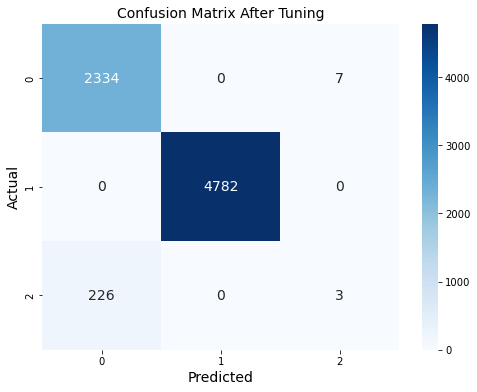

In [315]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_xgb_new = clf_xgb_new.predict(X_test)

# Calculate the confusion matrix
conf_matrix_new = confusion_matrix(y_test, y_pred_xgb_new)

# Print the confusion matrix
plt.figure(figsize=(8, 6))
print(conf_matrix_new)

# Create a heatmap
sns.heatmap(conf_matrix_new , annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix After Tuning', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [282]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb_new))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.30      0.01      0.03       229

    accuracy                           0.97      7352
   macro avg       0.74      0.67      0.66      7352
weighted avg       0.95      0.97      0.95      7352



### ROC Plot for XGBoost Classification

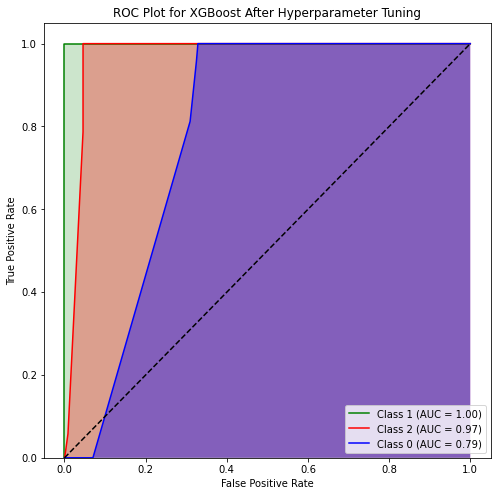

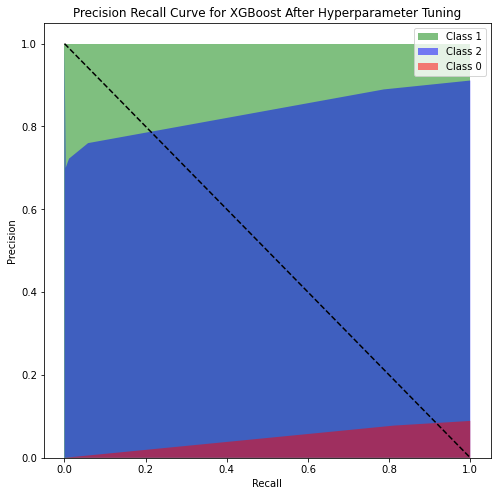

In [311]:
# Make predictions on the test data
y_pred_proba_xgb_new = clf_xgb_new.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_proba_xgb_new[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_proba_xgb_new[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_proba_xgb_new[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for XGBoost After Hyperparameter Tuning')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_proba_xgb_new[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_proba_xgb_new[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_proba_xgb_new[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for XGBoost After Hyperparameter Tuning')
plt.show()

# Perform CatBoost Classification

In [274]:
from catboost import CatBoostClassifier, Pool

catboost_train_data = Pool(X_train, y_train)
clf_cat = CatBoostClassifier(iterations=50, depth=3, learning_rate=0.1,loss_function='MultiClass')
clf_cat.fit(catboost_train_data, plot = True)

y_pred_cat = clf_cat.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9256230	total: 67.8ms	remaining: 3.32s
1:	learn: 0.7968330	total: 72.9ms	remaining: 1.75s
2:	learn: 0.6960387	total: 75.8ms	remaining: 1.19s
3:	learn: 0.6148056	total: 78.5ms	remaining: 903ms
4:	learn: 0.5474205	total: 81ms	remaining: 729ms
5:	learn: 0.4914186	total: 83.4ms	remaining: 611ms
6:	learn: 0.4441220	total: 87.5ms	remaining: 538ms
7:	learn: 0.4036517	total: 89.4ms	remaining: 469ms
8:	learn: 0.3683805	total: 91.5ms	remaining: 417ms
9:	learn: 0.3380891	total: 97.4ms	remaining: 390ms
10:	learn: 0.3118655	total: 100ms	remaining: 355ms
11:	learn: 0.2888778	total: 103ms	remaining: 327ms
12:	learn: 0.2685871	total: 106ms	remaining: 301ms
13:	learn: 0.2502477	total: 108ms	remaining: 278ms
14:	learn: 0.2344443	total: 110ms	remaining: 257ms
15:	learn: 0.2201240	total: 113ms	remaining: 240ms
16:	learn: 0.2073929	total: 121ms	remaining: 234ms
17:	learn: 0.1961931	total: 128ms	remaining: 227ms
18:	learn: 0.1864037	total: 130ms	remaining: 211ms
19:	learn: 0.1776174	total: 135ms

### Evaluate the Performance

[[2341    0    0]
 [   0 4782    0]
 [ 229    0    0]]


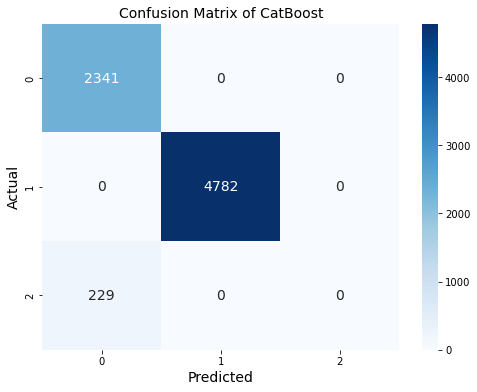

In [275]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_cat = clf_cat.predict(X_test)

# Calculate the confusion matrix
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)

# Print the confusion matrix
print(conf_matrix_cat)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of CatBoost', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [277]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2341
           1       1.00      1.00      1.00      4782
           2       0.00      0.00      0.00       229

    accuracy                           0.97      7352
   macro avg       0.64      0.67      0.65      7352
weighted avg       0.94      0.97      0.95      7352



/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC Plot for CatBoost Classification

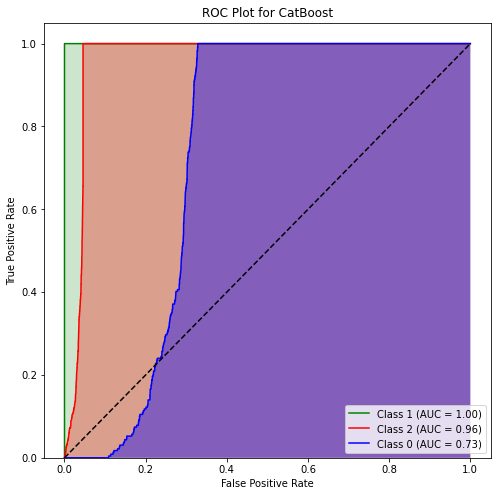

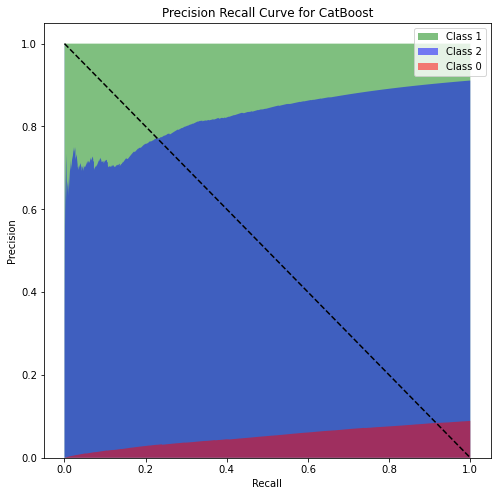

In [302]:
# Make predictions on the test data
y_pred_proba_cat = clf_cat.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_proba_cat[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_proba_cat[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_proba_cat[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for CatBoost')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_proba_cat[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_proba_cat[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_proba_cat[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for CatBoost')
plt.show()

### Feature Importance

In [ ]:
feature_imp_cat = pd.Series(clf_cat.feature_importances_,index=cols[~cols.isin(['state'])].to_list()).sort_values(ascending=False)[:10]
feature_imp_cat

### Plot the Feature Importance

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_imp_cat, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features For CatBoost", fontsize = 15)
plt.legend()
plt.show()

### Optimizing the Model by Hyperparametric Tuning

In [281]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'iterations': [50, 100, 150],
              'depth': [3, 4, 5],
              'learning_rate': [0.1, 0.3, 0.5]}

# Create a GridSearchCV object
grid_search_cat = GridSearchCV(clf_cat, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search_cat.fit(X,y)

0:	learn: 0.9255708	total: 4.73ms	remaining: 232ms
1:	learn: 0.7966909	total: 7.79ms	remaining: 187ms
2:	learn: 0.6958749	total: 10.7ms	remaining: 168ms
3:	learn: 0.6146261	total: 13ms	remaining: 149ms
4:	learn: 0.5471241	total: 16ms	remaining: 144ms
5:	learn: 0.4911345	total: 18.9ms	remaining: 138ms
6:	learn: 0.4426667	total: 21.6ms	remaining: 133ms
7:	learn: 0.4022067	total: 26.5ms	remaining: 139ms
8:	learn: 0.3667591	total: 29.2ms	remaining: 133ms
9:	learn: 0.3364735	total: 32.1ms	remaining: 129ms
10:	learn: 0.3102302	total: 36ms	remaining: 128ms
11:	learn: 0.2863294	total: 38.6ms	remaining: 122ms
12:	learn: 0.2649596	total: 44ms	remaining: 125ms
13:	learn: 0.2464908	total: 46.5ms	remaining: 120ms
14:	learn: 0.2298519	total: 49.6ms	remaining: 116ms
15:	learn: 0.2154628	total: 52.5ms	remaining: 112ms
16:	learn: 0.2025993	total: 55.1ms	remaining: 107ms
17:	learn: 0.1909740	total: 58.5ms	remaining: 104ms
18:	learn: 0.1803279	total: 60.9ms	remaining: 99.4ms
19:	learn: 0.1708388	total: 6

25:	learn: 0.1393567	total: 86.4ms	remaining: 79.8ms
26:	learn: 0.1350888	total: 89.1ms	remaining: 75.9ms
27:	learn: 0.1310305	total: 93.8ms	remaining: 73.7ms
28:	learn: 0.1274756	total: 96.1ms	remaining: 69.6ms
29:	learn: 0.1240602	total: 104ms	remaining: 69.6ms
30:	learn: 0.1211367	total: 110ms	remaining: 67.7ms
31:	learn: 0.1180653	total: 113ms	remaining: 63.6ms
32:	learn: 0.1155558	total: 121ms	remaining: 62.4ms
33:	learn: 0.1134488	total: 130ms	remaining: 61ms
34:	learn: 0.1113770	total: 135ms	remaining: 57.8ms
35:	learn: 0.1094738	total: 138ms	remaining: 53.5ms
36:	learn: 0.1077727	total: 142ms	remaining: 49.8ms
37:	learn: 0.1068514	total: 144ms	remaining: 45.5ms
38:	learn: 0.1055041	total: 151ms	remaining: 42.5ms
39:	learn: 0.1044155	total: 155ms	remaining: 38.8ms
40:	learn: 0.1031854	total: 157ms	remaining: 34.5ms
41:	learn: 0.1025750	total: 160ms	remaining: 30.4ms
42:	learn: 0.1015197	total: 162ms	remaining: 26.4ms
43:	learn: 0.1010714	total: 165ms	remaining: 22.5ms
44:	learn:

42:	learn: 0.0801714	total: 163ms	remaining: 26.6ms
43:	learn: 0.0800809	total: 166ms	remaining: 22.7ms
44:	learn: 0.0798939	total: 171ms	remaining: 19ms
45:	learn: 0.0797322	total: 174ms	remaining: 15.1ms
46:	learn: 0.0795761	total: 176ms	remaining: 11.2ms
47:	learn: 0.0794718	total: 179ms	remaining: 7.44ms
48:	learn: 0.0792944	total: 181ms	remaining: 3.7ms
49:	learn: 0.0791571	total: 184ms	remaining: 0us
0:	learn: 0.6388907	total: 3.14ms	remaining: 154ms
1:	learn: 0.4473042	total: 5.33ms	remaining: 128ms
2:	learn: 0.3368306	total: 7.83ms	remaining: 123ms
3:	learn: 0.2665278	total: 10.2ms	remaining: 118ms
4:	learn: 0.2186514	total: 15.7ms	remaining: 141ms
5:	learn: 0.1848519	total: 18.3ms	remaining: 134ms
6:	learn: 0.1603548	total: 20.8ms	remaining: 128ms
7:	learn: 0.1415307	total: 23.4ms	remaining: 123ms
8:	learn: 0.1283514	total: 26.2ms	remaining: 119ms
9:	learn: 0.1190086	total: 28.7ms	remaining: 115ms
10:	learn: 0.1106743	total: 31.4ms	remaining: 111ms
11:	learn: 0.1049165	total: 

26:	learn: 0.0679724	total: 64.3ms	remaining: 54.7ms
27:	learn: 0.0676759	total: 66.5ms	remaining: 52.3ms
28:	learn: 0.0672651	total: 69.3ms	remaining: 50.2ms
29:	learn: 0.0661261	total: 71.8ms	remaining: 47.8ms
30:	learn: 0.0657095	total: 85ms	remaining: 52.1ms
31:	learn: 0.0655033	total: 90ms	remaining: 50.6ms
32:	learn: 0.0644577	total: 93.4ms	remaining: 48.1ms
33:	learn: 0.0642927	total: 95.6ms	remaining: 45ms
34:	learn: 0.0641460	total: 98.4ms	remaining: 42.2ms
35:	learn: 0.0635534	total: 101ms	remaining: 39.2ms
36:	learn: 0.0630550	total: 103ms	remaining: 36.2ms
37:	learn: 0.0628472	total: 105ms	remaining: 33.1ms
38:	learn: 0.0626231	total: 108ms	remaining: 30.3ms
39:	learn: 0.0624691	total: 110ms	remaining: 27.6ms
40:	learn: 0.0621591	total: 113ms	remaining: 24.7ms
41:	learn: 0.0618627	total: 115ms	remaining: 22ms
42:	learn: 0.0615680	total: 118ms	remaining: 19.2ms
43:	learn: 0.0615141	total: 120ms	remaining: 16.4ms
44:	learn: 0.0613812	total: 124ms	remaining: 13.7ms
45:	learn: 

42:	learn: 0.0770385	total: 110ms	remaining: 17.9ms
43:	learn: 0.0768574	total: 113ms	remaining: 15.4ms
44:	learn: 0.0767373	total: 115ms	remaining: 12.8ms
45:	learn: 0.0766803	total: 117ms	remaining: 10.2ms
46:	learn: 0.0759859	total: 120ms	remaining: 7.63ms
47:	learn: 0.0758034	total: 122ms	remaining: 5.08ms
48:	learn: 0.0756119	total: 127ms	remaining: 2.59ms
49:	learn: 0.0754536	total: 130ms	remaining: 0us
0:	learn: 0.4319047	total: 1.81ms	remaining: 88.9ms
1:	learn: 0.2747933	total: 6.01ms	remaining: 144ms
2:	learn: 0.2000481	total: 10.7ms	remaining: 167ms
3:	learn: 0.1547756	total: 13.3ms	remaining: 153ms
4:	learn: 0.1289679	total: 16.2ms	remaining: 145ms
5:	learn: 0.1119941	total: 18.3ms	remaining: 135ms
6:	learn: 0.1021686	total: 20.8ms	remaining: 128ms
7:	learn: 0.0970903	total: 23.7ms	remaining: 125ms
8:	learn: 0.0922297	total: 26.2ms	remaining: 119ms
9:	learn: 0.0909797	total: 30.1ms	remaining: 120ms
10:	learn: 0.0901263	total: 32.5ms	remaining: 115ms
11:	learn: 0.0880275	tot

12:	learn: 0.2679528	total: 44ms	remaining: 295ms
13:	learn: 0.2502307	total: 49ms	remaining: 301ms
14:	learn: 0.2341394	total: 53.1ms	remaining: 301ms
15:	learn: 0.2196230	total: 65.1ms	remaining: 342ms
16:	learn: 0.2068415	total: 67.7ms	remaining: 330ms
17:	learn: 0.1956471	total: 70.1ms	remaining: 319ms
18:	learn: 0.1855351	total: 73.9ms	remaining: 315ms
19:	learn: 0.1764842	total: 76.2ms	remaining: 305ms
20:	learn: 0.1680407	total: 79.2ms	remaining: 298ms
21:	learn: 0.1610239	total: 82.1ms	remaining: 291ms
22:	learn: 0.1542923	total: 84.7ms	remaining: 284ms
23:	learn: 0.1482026	total: 88ms	remaining: 279ms
24:	learn: 0.1427526	total: 90.5ms	remaining: 271ms
25:	learn: 0.1373136	total: 97.8ms	remaining: 278ms
26:	learn: 0.1329845	total: 103ms	remaining: 278ms
27:	learn: 0.1287368	total: 106ms	remaining: 273ms
28:	learn: 0.1253419	total: 109ms	remaining: 266ms
29:	learn: 0.1217109	total: 112ms	remaining: 261ms
30:	learn: 0.1187772	total: 114ms	remaining: 255ms
31:	learn: 0.1161385	to

88:	learn: 0.0840408	total: 247ms	remaining: 30.6ms
89:	learn: 0.0838343	total: 251ms	remaining: 27.9ms
90:	learn: 0.0837064	total: 254ms	remaining: 25.1ms
91:	learn: 0.0833468	total: 256ms	remaining: 22.3ms
92:	learn: 0.0831978	total: 258ms	remaining: 19.4ms
93:	learn: 0.0830120	total: 260ms	remaining: 16.6ms
94:	learn: 0.0829195	total: 262ms	remaining: 13.8ms
95:	learn: 0.0826008	total: 265ms	remaining: 11.1ms
96:	learn: 0.0823873	total: 268ms	remaining: 8.29ms
97:	learn: 0.0820664	total: 271ms	remaining: 5.52ms
98:	learn: 0.0819546	total: 273ms	remaining: 2.76ms
99:	learn: 0.0818167	total: 275ms	remaining: 0us
0:	learn: 0.9255136	total: 2.53ms	remaining: 251ms
1:	learn: 0.7966644	total: 4.97ms	remaining: 244ms
2:	learn: 0.6958468	total: 6.68ms	remaining: 216ms
3:	learn: 0.6146508	total: 8.89ms	remaining: 213ms
4:	learn: 0.5471935	total: 13.4ms	remaining: 254ms
5:	learn: 0.4912040	total: 16.3ms	remaining: 255ms
6:	learn: 0.4438953	total: 19ms	remaining: 252ms
7:	learn: 0.4033958	tota

59:	learn: 0.0908033	total: 226ms	remaining: 150ms
60:	learn: 0.0905408	total: 229ms	remaining: 146ms
61:	learn: 0.0901047	total: 232ms	remaining: 142ms
62:	learn: 0.0890283	total: 238ms	remaining: 140ms
63:	learn: 0.0886521	total: 256ms	remaining: 144ms
64:	learn: 0.0884826	total: 270ms	remaining: 146ms
65:	learn: 0.0881390	total: 273ms	remaining: 141ms
66:	learn: 0.0879621	total: 282ms	remaining: 139ms
67:	learn: 0.0873631	total: 285ms	remaining: 134ms
68:	learn: 0.0872176	total: 287ms	remaining: 129ms
69:	learn: 0.0870917	total: 290ms	remaining: 124ms
70:	learn: 0.0865533	total: 293ms	remaining: 120ms
71:	learn: 0.0863327	total: 296ms	remaining: 115ms
72:	learn: 0.0860847	total: 298ms	remaining: 110ms
73:	learn: 0.0859162	total: 301ms	remaining: 106ms
74:	learn: 0.0857306	total: 307ms	remaining: 102ms
75:	learn: 0.0856186	total: 310ms	remaining: 97.9ms
76:	learn: 0.0854272	total: 313ms	remaining: 93.5ms
77:	learn: 0.0852031	total: 316ms	remaining: 89.1ms
78:	learn: 0.0850491	total: 

52:	learn: 0.0787941	total: 132ms	remaining: 117ms
53:	learn: 0.0786440	total: 135ms	remaining: 115ms
54:	learn: 0.0785162	total: 137ms	remaining: 112ms
55:	learn: 0.0783657	total: 140ms	remaining: 110ms
56:	learn: 0.0781639	total: 143ms	remaining: 108ms
57:	learn: 0.0780764	total: 145ms	remaining: 105ms
58:	learn: 0.0778529	total: 147ms	remaining: 102ms
59:	learn: 0.0777352	total: 149ms	remaining: 99.1ms
60:	learn: 0.0776186	total: 150ms	remaining: 96.2ms
61:	learn: 0.0773668	total: 153ms	remaining: 93.8ms
62:	learn: 0.0772052	total: 156ms	remaining: 91.6ms
63:	learn: 0.0770992	total: 159ms	remaining: 89.2ms
64:	learn: 0.0768917	total: 161ms	remaining: 86.6ms
65:	learn: 0.0767927	total: 163ms	remaining: 84.1ms
66:	learn: 0.0766749	total: 166ms	remaining: 81.6ms
67:	learn: 0.0764941	total: 168ms	remaining: 79.2ms
68:	learn: 0.0763501	total: 171ms	remaining: 76.6ms
69:	learn: 0.0762950	total: 172ms	remaining: 73.9ms
70:	learn: 0.0762448	total: 175ms	remaining: 71.4ms
71:	learn: 0.076107

42:	learn: 0.0822105	total: 118ms	remaining: 157ms
43:	learn: 0.0819889	total: 123ms	remaining: 156ms
44:	learn: 0.0818355	total: 125ms	remaining: 153ms
45:	learn: 0.0816450	total: 128ms	remaining: 150ms
46:	learn: 0.0813968	total: 131ms	remaining: 147ms
47:	learn: 0.0811876	total: 133ms	remaining: 144ms
48:	learn: 0.0810445	total: 135ms	remaining: 141ms
49:	learn: 0.0809396	total: 137ms	remaining: 137ms
50:	learn: 0.0805818	total: 140ms	remaining: 134ms
51:	learn: 0.0804557	total: 143ms	remaining: 132ms
52:	learn: 0.0802691	total: 146ms	remaining: 130ms
53:	learn: 0.0801888	total: 149ms	remaining: 127ms
54:	learn: 0.0799341	total: 152ms	remaining: 124ms
55:	learn: 0.0797560	total: 154ms	remaining: 121ms
56:	learn: 0.0795509	total: 156ms	remaining: 118ms
57:	learn: 0.0794181	total: 158ms	remaining: 115ms
58:	learn: 0.0789423	total: 161ms	remaining: 112ms
59:	learn: 0.0787477	total: 164ms	remaining: 109ms
60:	learn: 0.0784508	total: 167ms	remaining: 107ms
61:	learn: 0.0782430	total: 169

32:	learn: 0.0644577	total: 99.1ms	remaining: 201ms
33:	learn: 0.0642927	total: 102ms	remaining: 199ms
34:	learn: 0.0641460	total: 109ms	remaining: 202ms
35:	learn: 0.0635534	total: 112ms	remaining: 200ms
36:	learn: 0.0630550	total: 115ms	remaining: 197ms
37:	learn: 0.0628472	total: 117ms	remaining: 191ms
38:	learn: 0.0626231	total: 120ms	remaining: 188ms
39:	learn: 0.0624691	total: 128ms	remaining: 192ms
40:	learn: 0.0621591	total: 132ms	remaining: 191ms
41:	learn: 0.0618627	total: 135ms	remaining: 187ms
42:	learn: 0.0615680	total: 137ms	remaining: 182ms
43:	learn: 0.0615141	total: 141ms	remaining: 180ms
44:	learn: 0.0613812	total: 144ms	remaining: 176ms
45:	learn: 0.0612556	total: 150ms	remaining: 176ms
46:	learn: 0.0611663	total: 153ms	remaining: 172ms
47:	learn: 0.0610337	total: 156ms	remaining: 169ms
48:	learn: 0.0607690	total: 160ms	remaining: 166ms
49:	learn: 0.0605464	total: 163ms	remaining: 163ms
50:	learn: 0.0601511	total: 167ms	remaining: 161ms
51:	learn: 0.0600840	total: 17

23:	learn: 0.0784621	total: 96.5ms	remaining: 306ms
24:	learn: 0.0780498	total: 99.2ms	remaining: 298ms
25:	learn: 0.0777000	total: 106ms	remaining: 301ms
26:	learn: 0.0772666	total: 109ms	remaining: 293ms
27:	learn: 0.0768654	total: 112ms	remaining: 287ms
28:	learn: 0.0764874	total: 113ms	remaining: 278ms
29:	learn: 0.0757331	total: 115ms	remaining: 269ms
30:	learn: 0.0746300	total: 120ms	remaining: 267ms
31:	learn: 0.0742422	total: 122ms	remaining: 260ms
32:	learn: 0.0739874	total: 127ms	remaining: 257ms
33:	learn: 0.0738637	total: 130ms	remaining: 253ms
34:	learn: 0.0735376	total: 133ms	remaining: 248ms
35:	learn: 0.0732723	total: 137ms	remaining: 243ms
36:	learn: 0.0730325	total: 139ms	remaining: 236ms
37:	learn: 0.0725652	total: 141ms	remaining: 230ms
38:	learn: 0.0719981	total: 144ms	remaining: 225ms
39:	learn: 0.0717511	total: 148ms	remaining: 222ms
40:	learn: 0.0714586	total: 151ms	remaining: 217ms
41:	learn: 0.0711256	total: 153ms	remaining: 211ms
42:	learn: 0.0710158	total: 1

98:	learn: 0.0692106	total: 339ms	remaining: 3.42ms
99:	learn: 0.0691609	total: 342ms	remaining: 0us
0:	learn: 0.4319047	total: 1.97ms	remaining: 195ms
1:	learn: 0.2747933	total: 3.76ms	remaining: 184ms
2:	learn: 0.2000481	total: 5.49ms	remaining: 177ms
3:	learn: 0.1547756	total: 7.58ms	remaining: 182ms
4:	learn: 0.1289679	total: 10.3ms	remaining: 195ms
5:	learn: 0.1119941	total: 12.5ms	remaining: 197ms
6:	learn: 0.1021686	total: 16.3ms	remaining: 216ms
7:	learn: 0.0970903	total: 19.3ms	remaining: 221ms
8:	learn: 0.0922297	total: 22.4ms	remaining: 226ms
9:	learn: 0.0909797	total: 27.3ms	remaining: 246ms
10:	learn: 0.0901263	total: 29.8ms	remaining: 241ms
11:	learn: 0.0880275	total: 32.3ms	remaining: 237ms
12:	learn: 0.0864365	total: 34.8ms	remaining: 233ms
13:	learn: 0.0859299	total: 37.3ms	remaining: 229ms
14:	learn: 0.0854312	total: 41.1ms	remaining: 233ms
15:	learn: 0.0842501	total: 43.4ms	remaining: 228ms
16:	learn: 0.0828687	total: 45.7ms	remaining: 223ms
17:	learn: 0.0824412	tota

78:	learn: 0.0774028	total: 201ms	remaining: 180ms
79:	learn: 0.0769683	total: 203ms	remaining: 178ms
80:	learn: 0.0768166	total: 206ms	remaining: 175ms
81:	learn: 0.0766277	total: 213ms	remaining: 176ms
82:	learn: 0.0765049	total: 217ms	remaining: 175ms
83:	learn: 0.0763591	total: 220ms	remaining: 173ms
84:	learn: 0.0761739	total: 224ms	remaining: 171ms
85:	learn: 0.0760697	total: 228ms	remaining: 169ms
86:	learn: 0.0755395	total: 231ms	remaining: 167ms
87:	learn: 0.0751403	total: 235ms	remaining: 166ms
88:	learn: 0.0749712	total: 244ms	remaining: 167ms
89:	learn: 0.0748884	total: 249ms	remaining: 166ms
90:	learn: 0.0748015	total: 252ms	remaining: 163ms
91:	learn: 0.0746102	total: 258ms	remaining: 163ms
92:	learn: 0.0744392	total: 261ms	remaining: 160ms
93:	learn: 0.0740895	total: 268ms	remaining: 160ms
94:	learn: 0.0738980	total: 271ms	remaining: 157ms
95:	learn: 0.0738180	total: 273ms	remaining: 154ms
96:	learn: 0.0736328	total: 276ms	remaining: 151ms
97:	learn: 0.0735325	total: 281

128:	learn: 0.0804457	total: 349ms	remaining: 56.7ms
129:	learn: 0.0803185	total: 351ms	remaining: 54ms
130:	learn: 0.0802733	total: 353ms	remaining: 51.2ms
131:	learn: 0.0802122	total: 355ms	remaining: 48.4ms
132:	learn: 0.0801691	total: 357ms	remaining: 45.6ms
133:	learn: 0.0800747	total: 360ms	remaining: 42.9ms
134:	learn: 0.0800396	total: 363ms	remaining: 40.3ms
135:	learn: 0.0799373	total: 365ms	remaining: 37.6ms
136:	learn: 0.0798266	total: 368ms	remaining: 34.9ms
137:	learn: 0.0797734	total: 370ms	remaining: 32.2ms
138:	learn: 0.0796635	total: 373ms	remaining: 29.5ms
139:	learn: 0.0795915	total: 375ms	remaining: 26.8ms
140:	learn: 0.0795538	total: 377ms	remaining: 24.1ms
141:	learn: 0.0795167	total: 380ms	remaining: 21.4ms
142:	learn: 0.0794277	total: 382ms	remaining: 18.7ms
143:	learn: 0.0793287	total: 384ms	remaining: 16ms
144:	learn: 0.0792763	total: 386ms	remaining: 13.3ms
145:	learn: 0.0792184	total: 389ms	remaining: 10.6ms
146:	learn: 0.0791882	total: 391ms	remaining: 7.99

36:	learn: 0.1077727	total: 94.3ms	remaining: 288ms
37:	learn: 0.1068514	total: 96.7ms	remaining: 285ms
38:	learn: 0.1055041	total: 100ms	remaining: 286ms
39:	learn: 0.1044155	total: 102ms	remaining: 282ms
40:	learn: 0.1031854	total: 105ms	remaining: 279ms
41:	learn: 0.1025750	total: 108ms	remaining: 278ms
42:	learn: 0.1015197	total: 111ms	remaining: 275ms
43:	learn: 0.1010714	total: 113ms	remaining: 272ms
44:	learn: 0.1005875	total: 116ms	remaining: 270ms
45:	learn: 0.0996315	total: 118ms	remaining: 267ms
46:	learn: 0.0991818	total: 121ms	remaining: 265ms
47:	learn: 0.0987888	total: 123ms	remaining: 262ms
48:	learn: 0.0984638	total: 126ms	remaining: 259ms
49:	learn: 0.0982119	total: 128ms	remaining: 255ms
50:	learn: 0.0977282	total: 131ms	remaining: 254ms
51:	learn: 0.0974458	total: 133ms	remaining: 251ms
52:	learn: 0.0971839	total: 135ms	remaining: 248ms
53:	learn: 0.0964098	total: 138ms	remaining: 245ms
54:	learn: 0.0962215	total: 142ms	remaining: 245ms
55:	learn: 0.0958293	total: 1

106:	learn: 0.0801084	total: 261ms	remaining: 105ms
107:	learn: 0.0800065	total: 264ms	remaining: 102ms
108:	learn: 0.0798368	total: 268ms	remaining: 101ms
109:	learn: 0.0796537	total: 271ms	remaining: 98.4ms
110:	learn: 0.0795308	total: 273ms	remaining: 96ms
111:	learn: 0.0794154	total: 275ms	remaining: 93.4ms
112:	learn: 0.0793116	total: 277ms	remaining: 90.8ms
113:	learn: 0.0790425	total: 280ms	remaining: 88.5ms
114:	learn: 0.0789198	total: 283ms	remaining: 86.1ms
115:	learn: 0.0788444	total: 285ms	remaining: 83.5ms
116:	learn: 0.0787463	total: 288ms	remaining: 81.1ms
117:	learn: 0.0786775	total: 290ms	remaining: 78.7ms
118:	learn: 0.0786052	total: 292ms	remaining: 76.2ms
119:	learn: 0.0785330	total: 295ms	remaining: 73.7ms
120:	learn: 0.0784288	total: 297ms	remaining: 71.2ms
121:	learn: 0.0783218	total: 299ms	remaining: 68.6ms
122:	learn: 0.0782603	total: 302ms	remaining: 66.3ms
123:	learn: 0.0781824	total: 304ms	remaining: 63.8ms
124:	learn: 0.0780888	total: 307ms	remaining: 61.3m

16:	learn: 0.0916914	total: 38.1ms	remaining: 298ms
17:	learn: 0.0909840	total: 40.9ms	remaining: 300ms
18:	learn: 0.0906817	total: 43.2ms	remaining: 298ms
19:	learn: 0.0891538	total: 45.5ms	remaining: 296ms
20:	learn: 0.0884080	total: 48.1ms	remaining: 296ms
21:	learn: 0.0879843	total: 50.4ms	remaining: 293ms
22:	learn: 0.0867303	total: 52.9ms	remaining: 292ms
23:	learn: 0.0863362	total: 55.7ms	remaining: 293ms
24:	learn: 0.0858245	total: 58ms	remaining: 290ms
25:	learn: 0.0854605	total: 60.6ms	remaining: 289ms
26:	learn: 0.0850735	total: 63.1ms	remaining: 287ms
27:	learn: 0.0847876	total: 65.5ms	remaining: 285ms
28:	learn: 0.0841346	total: 68ms	remaining: 284ms
29:	learn: 0.0837805	total: 70.4ms	remaining: 281ms
30:	learn: 0.0835231	total: 72.4ms	remaining: 278ms
31:	learn: 0.0832845	total: 74.7ms	remaining: 275ms
32:	learn: 0.0829731	total: 76.8ms	remaining: 272ms
33:	learn: 0.0824761	total: 78.8ms	remaining: 269ms
34:	learn: 0.0823109	total: 81.2ms	remaining: 267ms
35:	learn: 0.081

92:	learn: 0.0692830	total: 246ms	remaining: 151ms
93:	learn: 0.0692010	total: 249ms	remaining: 148ms
94:	learn: 0.0691010	total: 256ms	remaining: 148ms
95:	learn: 0.0690040	total: 259ms	remaining: 146ms
96:	learn: 0.0689071	total: 261ms	remaining: 143ms
97:	learn: 0.0687805	total: 264ms	remaining: 140ms
98:	learn: 0.0685726	total: 266ms	remaining: 137ms
99:	learn: 0.0685074	total: 269ms	remaining: 135ms
100:	learn: 0.0683704	total: 271ms	remaining: 132ms
101:	learn: 0.0682597	total: 274ms	remaining: 129ms
102:	learn: 0.0681595	total: 277ms	remaining: 126ms
103:	learn: 0.0680441	total: 280ms	remaining: 124ms
104:	learn: 0.0680050	total: 282ms	remaining: 121ms
105:	learn: 0.0679449	total: 285ms	remaining: 118ms
106:	learn: 0.0678647	total: 287ms	remaining: 115ms
107:	learn: 0.0678128	total: 289ms	remaining: 113ms
108:	learn: 0.0676666	total: 292ms	remaining: 110ms
109:	learn: 0.0675657	total: 294ms	remaining: 107ms
110:	learn: 0.0674640	total: 296ms	remaining: 104ms
111:	learn: 0.067436

18:	learn: 0.0903184	total: 46.3ms	remaining: 319ms
19:	learn: 0.0897865	total: 49ms	remaining: 318ms
20:	learn: 0.0892637	total: 51.3ms	remaining: 315ms
21:	learn: 0.0884691	total: 53.5ms	remaining: 311ms
22:	learn: 0.0876406	total: 56.1ms	remaining: 310ms
23:	learn: 0.0868365	total: 58.1ms	remaining: 305ms
24:	learn: 0.0860040	total: 60.2ms	remaining: 301ms
25:	learn: 0.0855398	total: 62.2ms	remaining: 297ms
26:	learn: 0.0851885	total: 64ms	remaining: 292ms
27:	learn: 0.0842369	total: 65.8ms	remaining: 287ms
28:	learn: 0.0836618	total: 68.6ms	remaining: 286ms
29:	learn: 0.0831157	total: 71ms	remaining: 284ms
30:	learn: 0.0826924	total: 73.4ms	remaining: 282ms
31:	learn: 0.0823261	total: 75.8ms	remaining: 279ms
32:	learn: 0.0819798	total: 78.2ms	remaining: 277ms
33:	learn: 0.0816141	total: 80.7ms	remaining: 275ms
34:	learn: 0.0811859	total: 83.4ms	remaining: 274ms
35:	learn: 0.0806714	total: 85.9ms	remaining: 272ms
36:	learn: 0.0801744	total: 88.2ms	remaining: 269ms
37:	learn: 0.07895

101:	learn: 0.0525554	total: 260ms	remaining: 122ms
102:	learn: 0.0525130	total: 262ms	remaining: 119ms
103:	learn: 0.0524629	total: 267ms	remaining: 118ms
104:	learn: 0.0524368	total: 270ms	remaining: 116ms
105:	learn: 0.0521781	total: 272ms	remaining: 113ms
106:	learn: 0.0520878	total: 274ms	remaining: 110ms
107:	learn: 0.0520563	total: 277ms	remaining: 108ms
108:	learn: 0.0520114	total: 279ms	remaining: 105ms
109:	learn: 0.0519682	total: 282ms	remaining: 102ms
110:	learn: 0.0518865	total: 284ms	remaining: 99.9ms
111:	learn: 0.0518528	total: 287ms	remaining: 97.3ms
112:	learn: 0.0517790	total: 289ms	remaining: 94.8ms
113:	learn: 0.0516937	total: 292ms	remaining: 92.3ms
114:	learn: 0.0516104	total: 295ms	remaining: 89.8ms
115:	learn: 0.0514920	total: 298ms	remaining: 87.4ms
116:	learn: 0.0514393	total: 301ms	remaining: 84.8ms
117:	learn: 0.0512380	total: 303ms	remaining: 82.2ms
118:	learn: 0.0511855	total: 305ms	remaining: 79.5ms
119:	learn: 0.0511078	total: 308ms	remaining: 77ms
120:

25:	learn: 0.0777000	total: 58.9ms	remaining: 281ms
26:	learn: 0.0772666	total: 61.3ms	remaining: 279ms
27:	learn: 0.0768654	total: 64.1ms	remaining: 279ms
28:	learn: 0.0764874	total: 66.3ms	remaining: 277ms
29:	learn: 0.0757331	total: 68.1ms	remaining: 272ms
30:	learn: 0.0746300	total: 70.1ms	remaining: 269ms
31:	learn: 0.0742422	total: 72.2ms	remaining: 266ms
32:	learn: 0.0739874	total: 74.6ms	remaining: 264ms
33:	learn: 0.0738637	total: 76.6ms	remaining: 261ms
34:	learn: 0.0735376	total: 80.1ms	remaining: 263ms
35:	learn: 0.0732723	total: 82.5ms	remaining: 261ms
36:	learn: 0.0730325	total: 85.1ms	remaining: 260ms
37:	learn: 0.0725652	total: 87.2ms	remaining: 257ms
38:	learn: 0.0719981	total: 89.5ms	remaining: 255ms
39:	learn: 0.0717511	total: 92.2ms	remaining: 254ms
40:	learn: 0.0714586	total: 94.7ms	remaining: 252ms
41:	learn: 0.0711256	total: 97ms	remaining: 249ms
42:	learn: 0.0710158	total: 99.7ms	remaining: 248ms
43:	learn: 0.0708498	total: 102ms	remaining: 245ms
44:	learn: 0.07

95:	learn: 0.0695468	total: 268ms	remaining: 151ms
96:	learn: 0.0694795	total: 272ms	remaining: 148ms
97:	learn: 0.0692438	total: 275ms	remaining: 146ms
98:	learn: 0.0692106	total: 278ms	remaining: 143ms
99:	learn: 0.0691609	total: 281ms	remaining: 140ms
100:	learn: 0.0691332	total: 283ms	remaining: 137ms
101:	learn: 0.0690304	total: 285ms	remaining: 134ms
102:	learn: 0.0689179	total: 288ms	remaining: 131ms
103:	learn: 0.0687975	total: 291ms	remaining: 129ms
104:	learn: 0.0686629	total: 293ms	remaining: 126ms
105:	learn: 0.0686380	total: 295ms	remaining: 123ms
106:	learn: 0.0685154	total: 297ms	remaining: 119ms
107:	learn: 0.0684704	total: 300ms	remaining: 117ms
108:	learn: 0.0683684	total: 302ms	remaining: 114ms
109:	learn: 0.0683436	total: 304ms	remaining: 111ms
110:	learn: 0.0682494	total: 306ms	remaining: 108ms
111:	learn: 0.0681145	total: 308ms	remaining: 105ms
112:	learn: 0.0680702	total: 311ms	remaining: 102ms
113:	learn: 0.0680039	total: 313ms	remaining: 98.8ms
114:	learn: 0.06

13:	learn: 0.2468819	total: 34.9ms	remaining: 89.9ms
14:	learn: 0.2294124	total: 37.5ms	remaining: 87.5ms
15:	learn: 0.2144168	total: 40ms	remaining: 85.1ms
16:	learn: 0.2021208	total: 42.7ms	remaining: 82.9ms
17:	learn: 0.1898987	total: 45.2ms	remaining: 80.3ms
18:	learn: 0.1788651	total: 48ms	remaining: 78.3ms
19:	learn: 0.1690158	total: 54.5ms	remaining: 81.8ms
20:	learn: 0.1607536	total: 78.3ms	remaining: 108ms
21:	learn: 0.1528374	total: 101ms	remaining: 129ms
22:	learn: 0.1458591	total: 106ms	remaining: 125ms
23:	learn: 0.1392173	total: 113ms	remaining: 122ms
24:	learn: 0.1335532	total: 116ms	remaining: 116ms
25:	learn: 0.1284030	total: 119ms	remaining: 110ms
26:	learn: 0.1236833	total: 121ms	remaining: 103ms
27:	learn: 0.1196982	total: 125ms	remaining: 98.2ms
28:	learn: 0.1158737	total: 128ms	remaining: 92.9ms
29:	learn: 0.1124016	total: 131ms	remaining: 87.6ms
30:	learn: 0.1094207	total: 134ms	remaining: 82.4ms
31:	learn: 0.1065623	total: 137ms	remaining: 77.2ms
32:	learn: 0.10

23:	learn: 0.1454317	total: 65.6ms	remaining: 71.1ms
24:	learn: 0.1398577	total: 68.5ms	remaining: 68.5ms
25:	learn: 0.1346361	total: 71.9ms	remaining: 66.4ms
26:	learn: 0.1303023	total: 75ms	remaining: 63.9ms
27:	learn: 0.1261035	total: 80.7ms	remaining: 63.4ms
28:	learn: 0.1225232	total: 83.5ms	remaining: 60.4ms
29:	learn: 0.1190465	total: 86.1ms	remaining: 57.4ms
30:	learn: 0.1160497	total: 89ms	remaining: 54.5ms
31:	learn: 0.1134438	total: 91.8ms	remaining: 51.7ms
32:	learn: 0.1108619	total: 94.7ms	remaining: 48.8ms
33:	learn: 0.1091528	total: 97.4ms	remaining: 45.8ms
34:	learn: 0.1069071	total: 100ms	remaining: 43ms
35:	learn: 0.1049233	total: 103ms	remaining: 40ms
36:	learn: 0.1030614	total: 106ms	remaining: 37.1ms
37:	learn: 0.1013056	total: 109ms	remaining: 34.3ms
38:	learn: 0.1005656	total: 111ms	remaining: 31.3ms
39:	learn: 0.0991744	total: 114ms	remaining: 28.5ms
40:	learn: 0.0983944	total: 117ms	remaining: 25.6ms
41:	learn: 0.0963788	total: 120ms	remaining: 22.8ms
42:	learn

34:	learn: 0.0772274	total: 116ms	remaining: 49.5ms
35:	learn: 0.0768103	total: 118ms	remaining: 46ms
36:	learn: 0.0764777	total: 121ms	remaining: 42.5ms
37:	learn: 0.0761342	total: 124ms	remaining: 39.2ms
38:	learn: 0.0754159	total: 127ms	remaining: 35.8ms
39:	learn: 0.0751429	total: 134ms	remaining: 33.5ms
40:	learn: 0.0748997	total: 137ms	remaining: 30ms
41:	learn: 0.0742657	total: 140ms	remaining: 26.6ms
42:	learn: 0.0740491	total: 142ms	remaining: 23.1ms
43:	learn: 0.0736547	total: 145ms	remaining: 19.7ms
44:	learn: 0.0732943	total: 147ms	remaining: 16.4ms
45:	learn: 0.0731211	total: 150ms	remaining: 13.1ms
46:	learn: 0.0728045	total: 153ms	remaining: 9.76ms
47:	learn: 0.0725868	total: 156ms	remaining: 6.5ms
48:	learn: 0.0724760	total: 159ms	remaining: 3.24ms
49:	learn: 0.0722731	total: 161ms	remaining: 0us
0:	learn: 0.6398729	total: 2.88ms	remaining: 141ms
1:	learn: 0.4472333	total: 4.92ms	remaining: 118ms
2:	learn: 0.3365887	total: 7.1ms	remaining: 111ms
3:	learn: 0.2654371	tota

43:	learn: 0.0568349	total: 159ms	remaining: 21.7ms
44:	learn: 0.0562987	total: 163ms	remaining: 18.1ms
45:	learn: 0.0560839	total: 165ms	remaining: 14.4ms
46:	learn: 0.0558809	total: 168ms	remaining: 10.7ms
47:	learn: 0.0555909	total: 171ms	remaining: 7.12ms
48:	learn: 0.0554134	total: 174ms	remaining: 3.55ms
49:	learn: 0.0550882	total: 178ms	remaining: 0us
0:	learn: 0.4334877	total: 2.31ms	remaining: 113ms
1:	learn: 0.2741309	total: 5.67ms	remaining: 136ms
2:	learn: 0.1957470	total: 7.64ms	remaining: 120ms
3:	learn: 0.1507340	total: 10.9ms	remaining: 125ms
4:	learn: 0.1251230	total: 14.3ms	remaining: 128ms
5:	learn: 0.1105317	total: 21.1ms	remaining: 155ms
6:	learn: 0.1015758	total: 23.9ms	remaining: 147ms
7:	learn: 0.0947801	total: 26.7ms	remaining: 140ms
8:	learn: 0.0914128	total: 29.3ms	remaining: 133ms
9:	learn: 0.0899209	total: 32.1ms	remaining: 129ms
10:	learn: 0.0860904	total: 34.6ms	remaining: 123ms
11:	learn: 0.0855269	total: 37.6ms	remaining: 119ms
12:	learn: 0.0842581	tota

26:	learn: 0.0710742	total: 69.5ms	remaining: 59.2ms
27:	learn: 0.0706359	total: 74.6ms	remaining: 58.6ms
28:	learn: 0.0701772	total: 77.6ms	remaining: 56.2ms
29:	learn: 0.0695595	total: 81ms	remaining: 54ms
30:	learn: 0.0690443	total: 83.9ms	remaining: 51.4ms
31:	learn: 0.0686815	total: 86.6ms	remaining: 48.7ms
32:	learn: 0.0682761	total: 89.9ms	remaining: 46.3ms
33:	learn: 0.0679167	total: 93.1ms	remaining: 43.8ms
34:	learn: 0.0676560	total: 95.8ms	remaining: 41ms
35:	learn: 0.0674330	total: 98.9ms	remaining: 38.5ms
36:	learn: 0.0671465	total: 102ms	remaining: 35.9ms
37:	learn: 0.0668290	total: 105ms	remaining: 33.1ms
38:	learn: 0.0665719	total: 112ms	remaining: 31.6ms
39:	learn: 0.0663193	total: 114ms	remaining: 28.6ms
40:	learn: 0.0661140	total: 117ms	remaining: 25.8ms
41:	learn: 0.0658250	total: 120ms	remaining: 22.9ms
42:	learn: 0.0655681	total: 123ms	remaining: 20ms
43:	learn: 0.0654283	total: 125ms	remaining: 17.1ms
44:	learn: 0.0651374	total: 128ms	remaining: 14.2ms
45:	learn:

63:	learn: 0.0864461	total: 200ms	remaining: 112ms
64:	learn: 0.0862299	total: 202ms	remaining: 109ms
65:	learn: 0.0859670	total: 205ms	remaining: 106ms
66:	learn: 0.0857369	total: 209ms	remaining: 103ms
67:	learn: 0.0855318	total: 212ms	remaining: 99.8ms
68:	learn: 0.0853526	total: 215ms	remaining: 96.5ms
69:	learn: 0.0849999	total: 217ms	remaining: 93.2ms
70:	learn: 0.0848633	total: 220ms	remaining: 90.1ms
71:	learn: 0.0846610	total: 223ms	remaining: 86.8ms
72:	learn: 0.0845276	total: 226ms	remaining: 83.6ms
73:	learn: 0.0843936	total: 229ms	remaining: 80.4ms
74:	learn: 0.0842121	total: 232ms	remaining: 77.2ms
75:	learn: 0.0839504	total: 234ms	remaining: 74ms
76:	learn: 0.0838439	total: 237ms	remaining: 70.8ms
77:	learn: 0.0836557	total: 240ms	remaining: 67.6ms
78:	learn: 0.0835191	total: 242ms	remaining: 64.4ms
79:	learn: 0.0833649	total: 245ms	remaining: 61.1ms
80:	learn: 0.0833082	total: 247ms	remaining: 58ms
81:	learn: 0.0831862	total: 250ms	remaining: 54.8ms
82:	learn: 0.0829899

58:	learn: 0.0917966	total: 198ms	remaining: 138ms
59:	learn: 0.0915787	total: 201ms	remaining: 134ms
60:	learn: 0.0913244	total: 204ms	remaining: 130ms
61:	learn: 0.0909809	total: 207ms	remaining: 127ms
62:	learn: 0.0906802	total: 210ms	remaining: 123ms
63:	learn: 0.0904402	total: 213ms	remaining: 120ms
64:	learn: 0.0902003	total: 216ms	remaining: 116ms
65:	learn: 0.0899018	total: 221ms	remaining: 114ms
66:	learn: 0.0896320	total: 224ms	remaining: 110ms
67:	learn: 0.0890691	total: 226ms	remaining: 107ms
68:	learn: 0.0887825	total: 230ms	remaining: 103ms
69:	learn: 0.0883558	total: 232ms	remaining: 99.5ms
70:	learn: 0.0881194	total: 235ms	remaining: 96.2ms
71:	learn: 0.0878692	total: 238ms	remaining: 92.6ms
72:	learn: 0.0877269	total: 241ms	remaining: 89.2ms
73:	learn: 0.0875755	total: 244ms	remaining: 85.7ms
74:	learn: 0.0874604	total: 246ms	remaining: 82.2ms
75:	learn: 0.0872713	total: 249ms	remaining: 78.6ms
76:	learn: 0.0870943	total: 253ms	remaining: 75.6ms
77:	learn: 0.0869564	to

60:	learn: 0.0591783	total: 167ms	remaining: 107ms
61:	learn: 0.0590553	total: 170ms	remaining: 104ms
62:	learn: 0.0588683	total: 173ms	remaining: 101ms
63:	learn: 0.0586933	total: 175ms	remaining: 98.6ms
64:	learn: 0.0585815	total: 178ms	remaining: 96ms
65:	learn: 0.0583658	total: 181ms	remaining: 93.3ms
66:	learn: 0.0582087	total: 184ms	remaining: 90.8ms
67:	learn: 0.0579995	total: 187ms	remaining: 88.1ms
68:	learn: 0.0578243	total: 190ms	remaining: 85.3ms
69:	learn: 0.0576429	total: 192ms	remaining: 82.5ms
70:	learn: 0.0575158	total: 195ms	remaining: 79.6ms
71:	learn: 0.0574049	total: 198ms	remaining: 76.8ms
72:	learn: 0.0573274	total: 202ms	remaining: 74.9ms
73:	learn: 0.0572221	total: 205ms	remaining: 72.1ms
74:	learn: 0.0570809	total: 208ms	remaining: 69.2ms
75:	learn: 0.0569164	total: 210ms	remaining: 66.4ms
76:	learn: 0.0568184	total: 215ms	remaining: 64.2ms
77:	learn: 0.0565740	total: 218ms	remaining: 61.5ms
78:	learn: 0.0564267	total: 221ms	remaining: 58.7ms
79:	learn: 0.0562

36:	learn: 0.0764777	total: 104ms	remaining: 177ms
37:	learn: 0.0761342	total: 108ms	remaining: 177ms
38:	learn: 0.0754159	total: 111ms	remaining: 174ms
39:	learn: 0.0751429	total: 114ms	remaining: 171ms
40:	learn: 0.0748997	total: 118ms	remaining: 169ms
41:	learn: 0.0742657	total: 120ms	remaining: 166ms
42:	learn: 0.0740491	total: 123ms	remaining: 163ms
43:	learn: 0.0736547	total: 126ms	remaining: 160ms
44:	learn: 0.0732943	total: 128ms	remaining: 157ms
45:	learn: 0.0731211	total: 131ms	remaining: 154ms
46:	learn: 0.0728045	total: 134ms	remaining: 151ms
47:	learn: 0.0725868	total: 136ms	remaining: 148ms
48:	learn: 0.0724760	total: 139ms	remaining: 145ms
49:	learn: 0.0722731	total: 142ms	remaining: 142ms
50:	learn: 0.0718556	total: 144ms	remaining: 139ms
51:	learn: 0.0716691	total: 147ms	remaining: 136ms
52:	learn: 0.0715986	total: 150ms	remaining: 133ms
53:	learn: 0.0711294	total: 153ms	remaining: 130ms
54:	learn: 0.0709391	total: 156ms	remaining: 127ms
55:	learn: 0.0707718	total: 159

16:	learn: 0.0869042	total: 44.6ms	remaining: 218ms
17:	learn: 0.0857230	total: 47.7ms	remaining: 217ms
18:	learn: 0.0844856	total: 51.1ms	remaining: 218ms
19:	learn: 0.0828870	total: 54.2ms	remaining: 217ms
20:	learn: 0.0818428	total: 56.9ms	remaining: 214ms
21:	learn: 0.0810848	total: 59.5ms	remaining: 211ms
22:	learn: 0.0799850	total: 61.9ms	remaining: 207ms
23:	learn: 0.0794188	total: 64.6ms	remaining: 205ms
24:	learn: 0.0788772	total: 67ms	remaining: 201ms
25:	learn: 0.0784848	total: 70ms	remaining: 199ms
26:	learn: 0.0780297	total: 72.6ms	remaining: 196ms
27:	learn: 0.0778678	total: 75.1ms	remaining: 193ms
28:	learn: 0.0773943	total: 77.8ms	remaining: 190ms
29:	learn: 0.0770420	total: 80.1ms	remaining: 187ms
30:	learn: 0.0764038	total: 83.2ms	remaining: 185ms
31:	learn: 0.0758377	total: 85.9ms	remaining: 183ms
32:	learn: 0.0754473	total: 88.4ms	remaining: 179ms
33:	learn: 0.0750410	total: 90.9ms	remaining: 177ms
34:	learn: 0.0746799	total: 93.6ms	remaining: 174ms
35:	learn: 0.074

0:	learn: 0.4334877	total: 2.87ms	remaining: 285ms
1:	learn: 0.2741309	total: 4.9ms	remaining: 240ms
2:	learn: 0.1957470	total: 7.15ms	remaining: 231ms
3:	learn: 0.1507340	total: 9.58ms	remaining: 230ms
4:	learn: 0.1251230	total: 12.9ms	remaining: 244ms
5:	learn: 0.1105317	total: 16.7ms	remaining: 262ms
6:	learn: 0.1015758	total: 20.1ms	remaining: 266ms
7:	learn: 0.0947801	total: 23.5ms	remaining: 270ms
8:	learn: 0.0914128	total: 25.9ms	remaining: 262ms
9:	learn: 0.0899209	total: 29ms	remaining: 261ms
10:	learn: 0.0860904	total: 32.8ms	remaining: 265ms
11:	learn: 0.0855269	total: 35.4ms	remaining: 259ms
12:	learn: 0.0842581	total: 38.1ms	remaining: 255ms
13:	learn: 0.0837241	total: 40.4ms	remaining: 248ms
14:	learn: 0.0822311	total: 43.1ms	remaining: 244ms
15:	learn: 0.0815945	total: 45.9ms	remaining: 241ms
16:	learn: 0.0810519	total: 48.8ms	remaining: 238ms
17:	learn: 0.0800869	total: 51.4ms	remaining: 234ms
18:	learn: 0.0794809	total: 53.9ms	remaining: 230ms
19:	learn: 0.0789061	tota

89:	learn: 0.0595350	total: 253ms	remaining: 28.2ms
90:	learn: 0.0593408	total: 256ms	remaining: 25.3ms
91:	learn: 0.0592368	total: 259ms	remaining: 22.5ms
92:	learn: 0.0592111	total: 261ms	remaining: 19.7ms
93:	learn: 0.0591116	total: 264ms	remaining: 16.9ms
94:	learn: 0.0589197	total: 267ms	remaining: 14ms
95:	learn: 0.0587576	total: 269ms	remaining: 11.2ms
96:	learn: 0.0586361	total: 273ms	remaining: 8.43ms
97:	learn: 0.0584646	total: 275ms	remaining: 5.62ms
98:	learn: 0.0582907	total: 278ms	remaining: 2.81ms
99:	learn: 0.0580923	total: 281ms	remaining: 0us
0:	learn: 0.4332357	total: 2.14ms	remaining: 212ms
1:	learn: 0.2745883	total: 4.29ms	remaining: 210ms
2:	learn: 0.1965176	total: 6.39ms	remaining: 207ms
3:	learn: 0.1540571	total: 8.89ms	remaining: 213ms
4:	learn: 0.1302247	total: 11.4ms	remaining: 217ms
5:	learn: 0.1142809	total: 14ms	remaining: 220ms
6:	learn: 0.1031392	total: 16.8ms	remaining: 223ms
7:	learn: 0.0976105	total: 19.7ms	remaining: 227ms
8:	learn: 0.0957201	total: 

69:	learn: 0.0603418	total: 200ms	remaining: 85.6ms
70:	learn: 0.0601613	total: 203ms	remaining: 83ms
71:	learn: 0.0601055	total: 207ms	remaining: 80.6ms
72:	learn: 0.0599752	total: 210ms	remaining: 77.7ms
73:	learn: 0.0598035	total: 213ms	remaining: 74.9ms
74:	learn: 0.0596506	total: 216ms	remaining: 72ms
75:	learn: 0.0594452	total: 219ms	remaining: 69.2ms
76:	learn: 0.0593607	total: 222ms	remaining: 66.2ms
77:	learn: 0.0591604	total: 245ms	remaining: 69ms
78:	learn: 0.0590791	total: 249ms	remaining: 66.3ms
79:	learn: 0.0589396	total: 254ms	remaining: 63.5ms
80:	learn: 0.0585656	total: 258ms	remaining: 60.5ms
81:	learn: 0.0584278	total: 261ms	remaining: 57.3ms
82:	learn: 0.0582405	total: 264ms	remaining: 54ms
83:	learn: 0.0581284	total: 269ms	remaining: 51.2ms
84:	learn: 0.0580009	total: 272ms	remaining: 48ms
85:	learn: 0.0578626	total: 278ms	remaining: 45.2ms
86:	learn: 0.0577651	total: 281ms	remaining: 41.9ms
87:	learn: 0.0576895	total: 284ms	remaining: 38.7ms
88:	learn: 0.0575950	t

134:	learn: 0.0637781	total: 447ms	remaining: 49.7ms
135:	learn: 0.0637186	total: 450ms	remaining: 46.3ms
136:	learn: 0.0635840	total: 452ms	remaining: 42.9ms
137:	learn: 0.0635192	total: 455ms	remaining: 39.5ms
138:	learn: 0.0634448	total: 457ms	remaining: 36.2ms
139:	learn: 0.0633254	total: 460ms	remaining: 32.8ms
140:	learn: 0.0632565	total: 462ms	remaining: 29.5ms
141:	learn: 0.0631736	total: 464ms	remaining: 26.1ms
142:	learn: 0.0630835	total: 467ms	remaining: 22.8ms
143:	learn: 0.0630044	total: 469ms	remaining: 19.6ms
144:	learn: 0.0629489	total: 472ms	remaining: 16.3ms
145:	learn: 0.0628979	total: 475ms	remaining: 13ms
146:	learn: 0.0628053	total: 477ms	remaining: 9.74ms
147:	learn: 0.0627093	total: 480ms	remaining: 6.48ms
148:	learn: 0.0626435	total: 482ms	remaining: 3.23ms
149:	learn: 0.0625695	total: 485ms	remaining: 0us
0:	learn: 0.9260762	total: 2.56ms	remaining: 382ms
1:	learn: 0.7966287	total: 4.66ms	remaining: 345ms
2:	learn: 0.6960720	total: 6.71ms	remaining: 329ms
3:	l

0:	learn: 0.9260782	total: 2.74ms	remaining: 409ms
1:	learn: 0.7968209	total: 5.39ms	remaining: 399ms
2:	learn: 0.6961426	total: 7.5ms	remaining: 368ms
3:	learn: 0.6144687	total: 9.82ms	remaining: 358ms
4:	learn: 0.5473914	total: 12.3ms	remaining: 357ms
5:	learn: 0.4915197	total: 15.4ms	remaining: 369ms
6:	learn: 0.4440893	total: 18ms	remaining: 368ms
7:	learn: 0.4036380	total: 20.8ms	remaining: 369ms
8:	learn: 0.3688272	total: 23.6ms	remaining: 370ms
9:	learn: 0.3385873	total: 25.9ms	remaining: 362ms
10:	learn: 0.3116808	total: 28.6ms	remaining: 361ms
11:	learn: 0.2887285	total: 31.2ms	remaining: 358ms
12:	learn: 0.2685388	total: 34.2ms	remaining: 360ms
13:	learn: 0.2507963	total: 37ms	remaining: 359ms
14:	learn: 0.2343044	total: 39.6ms	remaining: 357ms
15:	learn: 0.2200592	total: 41.9ms	remaining: 351ms
16:	learn: 0.2077389	total: 44.7ms	remaining: 350ms
17:	learn: 0.1962790	total: 47.3ms	remaining: 347ms
18:	learn: 0.1861483	total: 50.3ms	remaining: 347ms
19:	learn: 0.1766352	total:

54:	learn: 0.0927586	total: 150ms	remaining: 259ms
55:	learn: 0.0925833	total: 153ms	remaining: 256ms
56:	learn: 0.0922576	total: 155ms	remaining: 253ms
57:	learn: 0.0919314	total: 158ms	remaining: 251ms
58:	learn: 0.0917966	total: 160ms	remaining: 247ms
59:	learn: 0.0915787	total: 164ms	remaining: 246ms
60:	learn: 0.0913244	total: 166ms	remaining: 243ms
61:	learn: 0.0909809	total: 168ms	remaining: 239ms
62:	learn: 0.0906802	total: 170ms	remaining: 235ms
63:	learn: 0.0904402	total: 174ms	remaining: 233ms
64:	learn: 0.0902003	total: 177ms	remaining: 232ms
65:	learn: 0.0899018	total: 180ms	remaining: 229ms
66:	learn: 0.0896320	total: 183ms	remaining: 226ms
67:	learn: 0.0890691	total: 186ms	remaining: 225ms
68:	learn: 0.0887825	total: 189ms	remaining: 222ms
69:	learn: 0.0883558	total: 192ms	remaining: 219ms
70:	learn: 0.0881194	total: 194ms	remaining: 216ms
71:	learn: 0.0878692	total: 197ms	remaining: 214ms
72:	learn: 0.0877269	total: 200ms	remaining: 211ms
73:	learn: 0.0875755	total: 202

102:	learn: 0.0764692	total: 290ms	remaining: 132ms
103:	learn: 0.0763885	total: 293ms	remaining: 130ms
104:	learn: 0.0762640	total: 296ms	remaining: 127ms
105:	learn: 0.0761748	total: 299ms	remaining: 124ms
106:	learn: 0.0760180	total: 301ms	remaining: 121ms
107:	learn: 0.0759151	total: 303ms	remaining: 118ms
108:	learn: 0.0758256	total: 307ms	remaining: 115ms
109:	learn: 0.0756818	total: 309ms	remaining: 113ms
110:	learn: 0.0755494	total: 312ms	remaining: 110ms
111:	learn: 0.0754222	total: 315ms	remaining: 107ms
112:	learn: 0.0753091	total: 318ms	remaining: 104ms
113:	learn: 0.0752062	total: 321ms	remaining: 101ms
114:	learn: 0.0750310	total: 324ms	remaining: 98.5ms
115:	learn: 0.0749325	total: 326ms	remaining: 95.6ms
116:	learn: 0.0748521	total: 329ms	remaining: 92.7ms
117:	learn: 0.0747449	total: 331ms	remaining: 89.8ms
118:	learn: 0.0746529	total: 334ms	remaining: 86.9ms
119:	learn: 0.0745990	total: 336ms	remaining: 84ms
120:	learn: 0.0744617	total: 339ms	remaining: 81.2ms
121:	le

146:	learn: 0.0493874	total: 418ms	remaining: 8.52ms
147:	learn: 0.0493066	total: 420ms	remaining: 5.67ms
148:	learn: 0.0492221	total: 423ms	remaining: 2.84ms
149:	learn: 0.0491524	total: 425ms	remaining: 0us
0:	learn: 0.6400411	total: 2.6ms	remaining: 388ms
1:	learn: 0.4469822	total: 4.73ms	remaining: 350ms
2:	learn: 0.3366391	total: 6.66ms	remaining: 326ms
3:	learn: 0.2647719	total: 8.74ms	remaining: 319ms
4:	learn: 0.2160547	total: 11.6ms	remaining: 336ms
5:	learn: 0.1817710	total: 14.2ms	remaining: 340ms
6:	learn: 0.1574101	total: 17ms	remaining: 347ms
7:	learn: 0.1384702	total: 19.7ms	remaining: 349ms
8:	learn: 0.1251964	total: 22.8ms	remaining: 357ms
9:	learn: 0.1147971	total: 26ms	remaining: 364ms
10:	learn: 0.1078247	total: 29.4ms	remaining: 372ms
11:	learn: 0.1024174	total: 32.5ms	remaining: 373ms
12:	learn: 0.0994097	total: 36.3ms	remaining: 383ms
13:	learn: 0.0957585	total: 39.1ms	remaining: 380ms
14:	learn: 0.0942876	total: 41.8ms	remaining: 376ms
15:	learn: 0.0920083	total

31:	learn: 0.0782842	total: 122ms	remaining: 449ms
32:	learn: 0.0779400	total: 125ms	remaining: 443ms
33:	learn: 0.0774985	total: 128ms	remaining: 435ms
34:	learn: 0.0772274	total: 131ms	remaining: 430ms
35:	learn: 0.0768103	total: 134ms	remaining: 424ms
36:	learn: 0.0764777	total: 138ms	remaining: 422ms
37:	learn: 0.0761342	total: 142ms	remaining: 418ms
38:	learn: 0.0754159	total: 145ms	remaining: 414ms
39:	learn: 0.0751429	total: 155ms	remaining: 426ms
40:	learn: 0.0748997	total: 160ms	remaining: 427ms
41:	learn: 0.0742657	total: 164ms	remaining: 422ms
42:	learn: 0.0740491	total: 167ms	remaining: 417ms
43:	learn: 0.0736547	total: 170ms	remaining: 410ms
44:	learn: 0.0732943	total: 173ms	remaining: 404ms
45:	learn: 0.0731211	total: 176ms	remaining: 399ms
46:	learn: 0.0728045	total: 181ms	remaining: 396ms
47:	learn: 0.0725868	total: 184ms	remaining: 391ms
48:	learn: 0.0724760	total: 187ms	remaining: 385ms
49:	learn: 0.0722731	total: 190ms	remaining: 380ms
50:	learn: 0.0718556	total: 194

64:	learn: 0.0755367	total: 200ms	remaining: 261ms
65:	learn: 0.0753082	total: 203ms	remaining: 259ms
66:	learn: 0.0751716	total: 207ms	remaining: 256ms
67:	learn: 0.0748200	total: 210ms	remaining: 253ms
68:	learn: 0.0747144	total: 212ms	remaining: 249ms
69:	learn: 0.0745802	total: 215ms	remaining: 245ms
70:	learn: 0.0744197	total: 217ms	remaining: 241ms
71:	learn: 0.0742537	total: 219ms	remaining: 237ms
72:	learn: 0.0741560	total: 222ms	remaining: 234ms
73:	learn: 0.0740026	total: 224ms	remaining: 231ms
74:	learn: 0.0738489	total: 227ms	remaining: 227ms
75:	learn: 0.0735604	total: 229ms	remaining: 223ms
76:	learn: 0.0734664	total: 232ms	remaining: 220ms
77:	learn: 0.0733660	total: 235ms	remaining: 216ms
78:	learn: 0.0732716	total: 239ms	remaining: 215ms
79:	learn: 0.0731714	total: 242ms	remaining: 212ms
80:	learn: 0.0728580	total: 245ms	remaining: 209ms
81:	learn: 0.0727374	total: 247ms	remaining: 205ms
82:	learn: 0.0726136	total: 250ms	remaining: 202ms
83:	learn: 0.0725229	total: 253

114:	learn: 0.0609156	total: 322ms	remaining: 98ms
115:	learn: 0.0608376	total: 325ms	remaining: 95.2ms
116:	learn: 0.0606675	total: 328ms	remaining: 92.4ms
117:	learn: 0.0605109	total: 331ms	remaining: 89.6ms
118:	learn: 0.0604571	total: 333ms	remaining: 86.9ms
119:	learn: 0.0603460	total: 336ms	remaining: 84.1ms
120:	learn: 0.0602727	total: 340ms	remaining: 81.5ms
121:	learn: 0.0601880	total: 342ms	remaining: 78.5ms
122:	learn: 0.0600668	total: 345ms	remaining: 75.7ms
123:	learn: 0.0599455	total: 347ms	remaining: 72.8ms
124:	learn: 0.0599002	total: 350ms	remaining: 69.9ms
125:	learn: 0.0597956	total: 353ms	remaining: 67.2ms
126:	learn: 0.0597175	total: 356ms	remaining: 64.4ms
127:	learn: 0.0596438	total: 359ms	remaining: 61.6ms
128:	learn: 0.0595213	total: 361ms	remaining: 58.8ms
129:	learn: 0.0594451	total: 364ms	remaining: 56ms
130:	learn: 0.0593676	total: 366ms	remaining: 53.2ms
131:	learn: 0.0592657	total: 369ms	remaining: 50.4ms
132:	learn: 0.0591107	total: 372ms	remaining: 47.5

0:	learn: 0.4334877	total: 2.2ms	remaining: 328ms
1:	learn: 0.2741309	total: 4.34ms	remaining: 321ms
2:	learn: 0.1957470	total: 6.35ms	remaining: 311ms
3:	learn: 0.1507340	total: 8.52ms	remaining: 311ms
4:	learn: 0.1251230	total: 11.2ms	remaining: 324ms
5:	learn: 0.1105317	total: 13.5ms	remaining: 324ms
6:	learn: 0.1015758	total: 16.2ms	remaining: 331ms
7:	learn: 0.0947801	total: 18.8ms	remaining: 334ms
8:	learn: 0.0914128	total: 21.7ms	remaining: 340ms
9:	learn: 0.0899209	total: 24.1ms	remaining: 338ms
10:	learn: 0.0860904	total: 26.7ms	remaining: 337ms
11:	learn: 0.0855269	total: 29.3ms	remaining: 337ms
12:	learn: 0.0842581	total: 31.6ms	remaining: 334ms
13:	learn: 0.0837241	total: 34.1ms	remaining: 331ms
14:	learn: 0.0822311	total: 37ms	remaining: 333ms
15:	learn: 0.0815945	total: 39.6ms	remaining: 332ms
16:	learn: 0.0810519	total: 42.3ms	remaining: 331ms
17:	learn: 0.0800869	total: 45ms	remaining: 330ms
18:	learn: 0.0794809	total: 47.7ms	remaining: 329ms
19:	learn: 0.0789061	total:

43:	learn: 0.0673614	total: 128ms	remaining: 309ms
44:	learn: 0.0672372	total: 132ms	remaining: 307ms
45:	learn: 0.0669280	total: 134ms	remaining: 304ms
46:	learn: 0.0667074	total: 138ms	remaining: 302ms
47:	learn: 0.0666357	total: 141ms	remaining: 300ms
48:	learn: 0.0663417	total: 144ms	remaining: 296ms
49:	learn: 0.0659514	total: 146ms	remaining: 292ms
50:	learn: 0.0657654	total: 148ms	remaining: 288ms
51:	learn: 0.0655469	total: 151ms	remaining: 285ms
52:	learn: 0.0652579	total: 154ms	remaining: 282ms
53:	learn: 0.0650450	total: 157ms	remaining: 279ms
54:	learn: 0.0649110	total: 159ms	remaining: 275ms
55:	learn: 0.0647084	total: 162ms	remaining: 271ms
56:	learn: 0.0645209	total: 165ms	remaining: 269ms
57:	learn: 0.0644587	total: 167ms	remaining: 265ms
58:	learn: 0.0641861	total: 170ms	remaining: 262ms
59:	learn: 0.0639250	total: 173ms	remaining: 259ms
60:	learn: 0.0636084	total: 175ms	remaining: 256ms
61:	learn: 0.0635167	total: 178ms	remaining: 252ms
62:	learn: 0.0634424	total: 181

85:	learn: 0.0653571	total: 253ms	remaining: 189ms
86:	learn: 0.0651434	total: 258ms	remaining: 187ms
87:	learn: 0.0650314	total: 260ms	remaining: 183ms
88:	learn: 0.0648518	total: 263ms	remaining: 180ms
89:	learn: 0.0647625	total: 265ms	remaining: 177ms
90:	learn: 0.0646869	total: 269ms	remaining: 174ms
91:	learn: 0.0644729	total: 271ms	remaining: 171ms
92:	learn: 0.0643031	total: 273ms	remaining: 168ms
93:	learn: 0.0641941	total: 276ms	remaining: 164ms
94:	learn: 0.0640905	total: 279ms	remaining: 161ms
95:	learn: 0.0639595	total: 282ms	remaining: 158ms
96:	learn: 0.0638235	total: 284ms	remaining: 155ms
97:	learn: 0.0636784	total: 287ms	remaining: 152ms
98:	learn: 0.0635599	total: 290ms	remaining: 149ms
99:	learn: 0.0634074	total: 293ms	remaining: 146ms
100:	learn: 0.0633138	total: 295ms	remaining: 143ms
101:	learn: 0.0631630	total: 298ms	remaining: 140ms
102:	learn: 0.0630307	total: 301ms	remaining: 137ms
103:	learn: 0.0629813	total: 303ms	remaining: 134ms
104:	learn: 0.0629126	total

132:	learn: 0.0527134	total: 396ms	remaining: 50.6ms
133:	learn: 0.0526444	total: 399ms	remaining: 47.6ms
134:	learn: 0.0525563	total: 402ms	remaining: 44.6ms
135:	learn: 0.0525087	total: 405ms	remaining: 41.7ms
136:	learn: 0.0523850	total: 407ms	remaining: 38.6ms
137:	learn: 0.0522732	total: 410ms	remaining: 35.7ms
138:	learn: 0.0521555	total: 412ms	remaining: 32.6ms
139:	learn: 0.0519783	total: 415ms	remaining: 29.6ms
140:	learn: 0.0519037	total: 417ms	remaining: 26.6ms
141:	learn: 0.0517772	total: 419ms	remaining: 23.6ms
142:	learn: 0.0517484	total: 422ms	remaining: 20.7ms
143:	learn: 0.0516902	total: 425ms	remaining: 17.7ms
144:	learn: 0.0515438	total: 427ms	remaining: 14.7ms
145:	learn: 0.0514979	total: 430ms	remaining: 11.8ms
146:	learn: 0.0514128	total: 433ms	remaining: 8.83ms
147:	learn: 0.0513463	total: 435ms	remaining: 5.88ms
148:	learn: 0.0512868	total: 438ms	remaining: 2.94ms
149:	learn: 0.0511926	total: 440ms	remaining: 0us
0:	learn: 0.9268002	total: 2.92ms	remaining: 143m

0:	learn: 0.9267143	total: 3ms	remaining: 147ms
1:	learn: 0.7979040	total: 14.5ms	remaining: 347ms
2:	learn: 0.6972104	total: 17.8ms	remaining: 278ms
3:	learn: 0.6156449	total: 20.2ms	remaining: 232ms
4:	learn: 0.5487898	total: 24.3ms	remaining: 218ms
5:	learn: 0.4925224	total: 27.4ms	remaining: 201ms
6:	learn: 0.4450252	total: 30.6ms	remaining: 188ms
7:	learn: 0.4045727	total: 33.9ms	remaining: 178ms
8:	learn: 0.3697945	total: 37.1ms	remaining: 169ms
9:	learn: 0.3395176	total: 40.8ms	remaining: 163ms
10:	learn: 0.3126595	total: 44.2ms	remaining: 157ms
11:	learn: 0.2892376	total: 47.4ms	remaining: 150ms
12:	learn: 0.2690199	total: 50.7ms	remaining: 144ms
13:	learn: 0.2506330	total: 54.1ms	remaining: 139ms
14:	learn: 0.2349145	total: 56.9ms	remaining: 133ms
15:	learn: 0.2205933	total: 59.7ms	remaining: 127ms
16:	learn: 0.2076087	total: 62.8ms	remaining: 122ms
17:	learn: 0.1959797	total: 65.8ms	remaining: 117ms
18:	learn: 0.1856877	total: 68.9ms	remaining: 112ms
19:	learn: 0.1761742	tota

9:	learn: 0.1149755	total: 29.7ms	remaining: 119ms
10:	learn: 0.1075390	total: 33ms	remaining: 117ms
11:	learn: 0.1017740	total: 35.7ms	remaining: 113ms
12:	learn: 0.0960230	total: 38.3ms	remaining: 109ms
13:	learn: 0.0928446	total: 41.7ms	remaining: 107ms
14:	learn: 0.0905767	total: 45.7ms	remaining: 107ms
15:	learn: 0.0891371	total: 49.3ms	remaining: 105ms
16:	learn: 0.0875894	total: 52.3ms	remaining: 101ms
17:	learn: 0.0867768	total: 55.5ms	remaining: 98.7ms
18:	learn: 0.0847137	total: 58.7ms	remaining: 95.8ms
19:	learn: 0.0831449	total: 62ms	remaining: 93ms
20:	learn: 0.0815852	total: 65.1ms	remaining: 89.9ms
21:	learn: 0.0808732	total: 68ms	remaining: 86.5ms
22:	learn: 0.0804347	total: 71ms	remaining: 83.4ms
23:	learn: 0.0799931	total: 74.1ms	remaining: 80.2ms
24:	learn: 0.0791325	total: 76.9ms	remaining: 76.9ms
25:	learn: 0.0785407	total: 79.6ms	remaining: 73.5ms
26:	learn: 0.0780229	total: 82.8ms	remaining: 70.6ms
27:	learn: 0.0775777	total: 85.8ms	remaining: 67.4ms
28:	learn: 0

20:	learn: 0.0628453	total: 67.2ms	remaining: 92.9ms
21:	learn: 0.0624163	total: 70.7ms	remaining: 90ms
22:	learn: 0.0615869	total: 73.7ms	remaining: 86.5ms
23:	learn: 0.0605425	total: 76.1ms	remaining: 82.5ms
24:	learn: 0.0600469	total: 79.3ms	remaining: 79.3ms
25:	learn: 0.0595127	total: 82.7ms	remaining: 76.3ms
26:	learn: 0.0589665	total: 85.6ms	remaining: 72.9ms
27:	learn: 0.0585116	total: 88.5ms	remaining: 69.5ms
28:	learn: 0.0580416	total: 91.4ms	remaining: 66.2ms
29:	learn: 0.0576215	total: 94.4ms	remaining: 62.9ms
30:	learn: 0.0572747	total: 97.3ms	remaining: 59.7ms
31:	learn: 0.0570119	total: 100ms	remaining: 56.5ms
32:	learn: 0.0566678	total: 104ms	remaining: 53.4ms
33:	learn: 0.0564346	total: 107ms	remaining: 50.4ms
34:	learn: 0.0559167	total: 110ms	remaining: 47.2ms
35:	learn: 0.0554892	total: 113ms	remaining: 44.1ms
36:	learn: 0.0550617	total: 117ms	remaining: 41ms
37:	learn: 0.0546205	total: 120ms	remaining: 37.8ms
38:	learn: 0.0542098	total: 123ms	remaining: 34.7ms
39:	l

37:	learn: 0.0717889	total: 124ms	remaining: 39.3ms
38:	learn: 0.0712486	total: 128ms	remaining: 36.1ms
39:	learn: 0.0706979	total: 131ms	remaining: 32.8ms
40:	learn: 0.0703716	total: 135ms	remaining: 29.6ms
41:	learn: 0.0700400	total: 138ms	remaining: 26.3ms
42:	learn: 0.0696422	total: 141ms	remaining: 22.9ms
43:	learn: 0.0694579	total: 144ms	remaining: 19.6ms
44:	learn: 0.0690895	total: 147ms	remaining: 16.3ms
45:	learn: 0.0687096	total: 150ms	remaining: 13ms
46:	learn: 0.0685013	total: 153ms	remaining: 9.76ms
47:	learn: 0.0682674	total: 156ms	remaining: 6.5ms
48:	learn: 0.0680414	total: 159ms	remaining: 3.25ms
49:	learn: 0.0677516	total: 162ms	remaining: 0us
0:	learn: 0.4351085	total: 2.88ms	remaining: 141ms
1:	learn: 0.2739942	total: 5.55ms	remaining: 133ms
2:	learn: 0.1969085	total: 8.17ms	remaining: 128ms
3:	learn: 0.1515534	total: 11.7ms	remaining: 134ms
4:	learn: 0.1250516	total: 14.8ms	remaining: 133ms
5:	learn: 0.1068674	total: 18.3ms	remaining: 135ms
6:	learn: 0.0966437	tota

0:	learn: 0.9268714	total: 2.62ms	remaining: 259ms
1:	learn: 0.7981551	total: 4.99ms	remaining: 245ms
2:	learn: 0.6974242	total: 7.34ms	remaining: 237ms
3:	learn: 0.6158168	total: 9.86ms	remaining: 237ms
4:	learn: 0.5488541	total: 15ms	remaining: 285ms
5:	learn: 0.4926704	total: 17.5ms	remaining: 274ms
6:	learn: 0.4452234	total: 20.4ms	remaining: 271ms
7:	learn: 0.4039442	total: 23.6ms	remaining: 272ms
8:	learn: 0.3688142	total: 26.5ms	remaining: 268ms
9:	learn: 0.3385153	total: 30.2ms	remaining: 272ms
10:	learn: 0.3118488	total: 33.9ms	remaining: 274ms
11:	learn: 0.2888166	total: 37.1ms	remaining: 272ms
12:	learn: 0.2686015	total: 40.4ms	remaining: 271ms
13:	learn: 0.2496339	total: 43.5ms	remaining: 267ms
14:	learn: 0.2332713	total: 46.9ms	remaining: 266ms
15:	learn: 0.2182952	total: 52.1ms	remaining: 273ms
16:	learn: 0.2055373	total: 57.1ms	remaining: 279ms
17:	learn: 0.1937681	total: 60.5ms	remaining: 276ms
18:	learn: 0.1830744	total: 65.9ms	remaining: 281ms
19:	learn: 0.1736432	tot

90:	learn: 0.0768121	total: 380ms	remaining: 37.6ms
91:	learn: 0.0767394	total: 385ms	remaining: 33.5ms
92:	learn: 0.0765700	total: 389ms	remaining: 29.3ms
93:	learn: 0.0763838	total: 394ms	remaining: 25.2ms
94:	learn: 0.0762458	total: 399ms	remaining: 21ms
95:	learn: 0.0760691	total: 402ms	remaining: 16.8ms
96:	learn: 0.0759177	total: 406ms	remaining: 12.6ms
97:	learn: 0.0757268	total: 409ms	remaining: 8.35ms
98:	learn: 0.0755276	total: 413ms	remaining: 4.17ms
99:	learn: 0.0754162	total: 416ms	remaining: 0us
0:	learn: 0.9267143	total: 3.61ms	remaining: 358ms
1:	learn: 0.7979040	total: 6.97ms	remaining: 341ms
2:	learn: 0.6972104	total: 12.8ms	remaining: 415ms
3:	learn: 0.6156449	total: 16ms	remaining: 384ms
4:	learn: 0.5487898	total: 20ms	remaining: 381ms
5:	learn: 0.4925224	total: 22.9ms	remaining: 359ms
6:	learn: 0.4450252	total: 26.1ms	remaining: 347ms
7:	learn: 0.4045727	total: 29.7ms	remaining: 341ms
8:	learn: 0.3697945	total: 34ms	remaining: 343ms
9:	learn: 0.3395176	total: 37.6m

94:	learn: 0.0741044	total: 329ms	remaining: 17.3ms
95:	learn: 0.0739560	total: 333ms	remaining: 13.9ms
96:	learn: 0.0738471	total: 336ms	remaining: 10.4ms
97:	learn: 0.0736996	total: 339ms	remaining: 6.92ms
98:	learn: 0.0735498	total: 342ms	remaining: 3.45ms
99:	learn: 0.0733915	total: 345ms	remaining: 0us
0:	learn: 0.6417127	total: 2.97ms	remaining: 294ms
1:	learn: 0.4494677	total: 5.51ms	remaining: 270ms
2:	learn: 0.3355484	total: 8.25ms	remaining: 267ms
3:	learn: 0.2629846	total: 11ms	remaining: 264ms
4:	learn: 0.2131296	total: 14.4ms	remaining: 274ms
5:	learn: 0.1764102	total: 18.1ms	remaining: 283ms
6:	learn: 0.1517063	total: 21.4ms	remaining: 285ms
7:	learn: 0.1321412	total: 24.7ms	remaining: 284ms
8:	learn: 0.1171691	total: 27.9ms	remaining: 282ms
9:	learn: 0.1061063	total: 31.8ms	remaining: 286ms
10:	learn: 0.0989977	total: 35ms	remaining: 283ms
11:	learn: 0.0926157	total: 38.3ms	remaining: 281ms
12:	learn: 0.0883472	total: 41.8ms	remaining: 280ms
13:	learn: 0.0849213	total: 4

95:	learn: 0.0641688	total: 395ms	remaining: 16.4ms
96:	learn: 0.0640834	total: 398ms	remaining: 12.3ms
97:	learn: 0.0639223	total: 401ms	remaining: 8.18ms
98:	learn: 0.0637444	total: 404ms	remaining: 4.08ms
99:	learn: 0.0635257	total: 407ms	remaining: 0us
0:	learn: 0.6416423	total: 2.44ms	remaining: 242ms
1:	learn: 0.4493247	total: 4.79ms	remaining: 234ms
2:	learn: 0.3383213	total: 7.79ms	remaining: 252ms
3:	learn: 0.2661762	total: 10.6ms	remaining: 255ms
4:	learn: 0.2182151	total: 13.7ms	remaining: 260ms
5:	learn: 0.1854361	total: 16.3ms	remaining: 255ms
6:	learn: 0.1598510	total: 19.3ms	remaining: 257ms
7:	learn: 0.1401239	total: 22.4ms	remaining: 258ms
8:	learn: 0.1248343	total: 25.4ms	remaining: 257ms
9:	learn: 0.1149755	total: 28.6ms	remaining: 257ms
10:	learn: 0.1075390	total: 31.9ms	remaining: 258ms
11:	learn: 0.1017740	total: 35.7ms	remaining: 262ms
12:	learn: 0.0960230	total: 39ms	remaining: 261ms
13:	learn: 0.0928446	total: 63.3ms	remaining: 389ms
14:	learn: 0.0905767	total:

98:	learn: 0.0661227	total: 353ms	remaining: 3.57ms
99:	learn: 0.0660527	total: 362ms	remaining: 0us
0:	learn: 0.6414668	total: 3.75ms	remaining: 371ms
1:	learn: 0.4493829	total: 6.46ms	remaining: 317ms
2:	learn: 0.3382017	total: 9.29ms	remaining: 300ms
3:	learn: 0.2660751	total: 12ms	remaining: 288ms
4:	learn: 0.2170894	total: 14.7ms	remaining: 279ms
5:	learn: 0.1800951	total: 17.7ms	remaining: 278ms
6:	learn: 0.1560691	total: 20.6ms	remaining: 274ms
7:	learn: 0.1386196	total: 22.9ms	remaining: 263ms
8:	learn: 0.1238084	total: 26.3ms	remaining: 266ms
9:	learn: 0.1138775	total: 29.7ms	remaining: 267ms
10:	learn: 0.1052367	total: 33.2ms	remaining: 268ms
11:	learn: 0.0995361	total: 36.5ms	remaining: 268ms
12:	learn: 0.0963317	total: 39.9ms	remaining: 267ms
13:	learn: 0.0924270	total: 43.2ms	remaining: 265ms
14:	learn: 0.0901566	total: 47.1ms	remaining: 267ms
15:	learn: 0.0884408	total: 51.2ms	remaining: 269ms
16:	learn: 0.0854206	total: 54.9ms	remaining: 268ms
17:	learn: 0.0842170	total:

82:	learn: 0.0438978	total: 326ms	remaining: 66.8ms
83:	learn: 0.0438235	total: 332ms	remaining: 63.3ms
84:	learn: 0.0436801	total: 336ms	remaining: 59.2ms
85:	learn: 0.0435528	total: 339ms	remaining: 55.2ms
86:	learn: 0.0433661	total: 342ms	remaining: 51.1ms
87:	learn: 0.0432562	total: 345ms	remaining: 47ms
88:	learn: 0.0430953	total: 348ms	remaining: 43ms
89:	learn: 0.0429855	total: 351ms	remaining: 39ms
90:	learn: 0.0428730	total: 364ms	remaining: 36ms
91:	learn: 0.0425880	total: 367ms	remaining: 31.9ms
92:	learn: 0.0424503	total: 372ms	remaining: 28ms
93:	learn: 0.0423296	total: 379ms	remaining: 24.2ms
94:	learn: 0.0421204	total: 382ms	remaining: 20.1ms
95:	learn: 0.0420111	total: 387ms	remaining: 16.1ms
96:	learn: 0.0417318	total: 393ms	remaining: 12.2ms
97:	learn: 0.0415985	total: 396ms	remaining: 8.08ms
98:	learn: 0.0414797	total: 403ms	remaining: 4.07ms
99:	learn: 0.0413535	total: 406ms	remaining: 0us
0:	learn: 0.4357391	total: 3.43ms	remaining: 339ms
1:	learn: 0.2752705	total:

64:	learn: 0.0580432	total: 202ms	remaining: 109ms
65:	learn: 0.0577547	total: 206ms	remaining: 106ms
66:	learn: 0.0574822	total: 209ms	remaining: 103ms
67:	learn: 0.0572967	total: 213ms	remaining: 100ms
68:	learn: 0.0571911	total: 215ms	remaining: 96.8ms
69:	learn: 0.0570276	total: 219ms	remaining: 93.7ms
70:	learn: 0.0568686	total: 222ms	remaining: 90.7ms
71:	learn: 0.0567307	total: 225ms	remaining: 87.7ms
72:	learn: 0.0565814	total: 228ms	remaining: 84.4ms
73:	learn: 0.0564653	total: 231ms	remaining: 81.3ms
74:	learn: 0.0563014	total: 235ms	remaining: 78.5ms
75:	learn: 0.0562282	total: 238ms	remaining: 75.2ms
76:	learn: 0.0560088	total: 241ms	remaining: 72ms
77:	learn: 0.0557489	total: 244ms	remaining: 68.8ms
78:	learn: 0.0556128	total: 247ms	remaining: 65.6ms
79:	learn: 0.0554419	total: 250ms	remaining: 62.5ms
80:	learn: 0.0551800	total: 253ms	remaining: 59.3ms
81:	learn: 0.0550422	total: 257ms	remaining: 56.3ms
82:	learn: 0.0549210	total: 260ms	remaining: 53.2ms
83:	learn: 0.05475

30:	learn: 0.0652496	total: 110ms	remaining: 245ms
31:	learn: 0.0648038	total: 113ms	remaining: 240ms
32:	learn: 0.0643982	total: 116ms	remaining: 237ms
33:	learn: 0.0640867	total: 120ms	remaining: 232ms
34:	learn: 0.0637881	total: 123ms	remaining: 229ms
35:	learn: 0.0634127	total: 126ms	remaining: 225ms
36:	learn: 0.0630831	total: 130ms	remaining: 222ms
37:	learn: 0.0628152	total: 133ms	remaining: 218ms
38:	learn: 0.0623514	total: 136ms	remaining: 213ms
39:	learn: 0.0619684	total: 139ms	remaining: 208ms
40:	learn: 0.0616568	total: 142ms	remaining: 204ms
41:	learn: 0.0613984	total: 145ms	remaining: 200ms
42:	learn: 0.0611905	total: 147ms	remaining: 195ms
43:	learn: 0.0609600	total: 150ms	remaining: 191ms
44:	learn: 0.0607960	total: 153ms	remaining: 187ms
45:	learn: 0.0605665	total: 156ms	remaining: 183ms
46:	learn: 0.0603045	total: 159ms	remaining: 179ms
47:	learn: 0.0601415	total: 162ms	remaining: 176ms
48:	learn: 0.0598953	total: 166ms	remaining: 172ms
49:	learn: 0.0596372	total: 169

92:	learn: 0.0655926	total: 316ms	remaining: 194ms
93:	learn: 0.0654707	total: 319ms	remaining: 190ms
94:	learn: 0.0653112	total: 323ms	remaining: 187ms
95:	learn: 0.0651661	total: 327ms	remaining: 184ms
96:	learn: 0.0650605	total: 331ms	remaining: 181ms
97:	learn: 0.0649458	total: 334ms	remaining: 177ms
98:	learn: 0.0648486	total: 337ms	remaining: 174ms
99:	learn: 0.0645702	total: 340ms	remaining: 170ms
100:	learn: 0.0644761	total: 344ms	remaining: 167ms
101:	learn: 0.0643679	total: 347ms	remaining: 163ms
102:	learn: 0.0641478	total: 351ms	remaining: 160ms
103:	learn: 0.0640088	total: 354ms	remaining: 157ms
104:	learn: 0.0639274	total: 357ms	remaining: 153ms
105:	learn: 0.0635988	total: 361ms	remaining: 150ms
106:	learn: 0.0634726	total: 364ms	remaining: 146ms
107:	learn: 0.0633194	total: 368ms	remaining: 143ms
108:	learn: 0.0632524	total: 371ms	remaining: 140ms
109:	learn: 0.0630666	total: 375ms	remaining: 136ms
110:	learn: 0.0629129	total: 377ms	remaining: 133ms
111:	learn: 0.062697

145:	learn: 0.0731093	total: 495ms	remaining: 13.6ms
146:	learn: 0.0729892	total: 501ms	remaining: 10.2ms
147:	learn: 0.0728841	total: 504ms	remaining: 6.81ms
148:	learn: 0.0728254	total: 508ms	remaining: 3.41ms
149:	learn: 0.0727208	total: 511ms	remaining: 0us
0:	learn: 0.9267783	total: 2.47ms	remaining: 368ms
1:	learn: 0.7980124	total: 4.78ms	remaining: 354ms
2:	learn: 0.6972743	total: 7.05ms	remaining: 346ms
3:	learn: 0.6156507	total: 9.81ms	remaining: 358ms
4:	learn: 0.5486589	total: 12.7ms	remaining: 370ms
5:	learn: 0.4924263	total: 15ms	remaining: 360ms
6:	learn: 0.4449865	total: 17.8ms	remaining: 363ms
7:	learn: 0.4045447	total: 20.8ms	remaining: 370ms
8:	learn: 0.3697893	total: 23.8ms	remaining: 373ms
9:	learn: 0.3391255	total: 26.9ms	remaining: 377ms
10:	learn: 0.3125206	total: 30.3ms	remaining: 382ms
11:	learn: 0.2895125	total: 33.5ms	remaining: 386ms
12:	learn: 0.2692968	total: 36.7ms	remaining: 386ms
13:	learn: 0.2506532	total: 39.8ms	remaining: 386ms
14:	learn: 0.2341581	t

9:	learn: 0.3395176	total: 28.4ms	remaining: 398ms
10:	learn: 0.3126595	total: 31.4ms	remaining: 397ms
11:	learn: 0.2892376	total: 34.8ms	remaining: 400ms
12:	learn: 0.2690199	total: 38.4ms	remaining: 404ms
13:	learn: 0.2506330	total: 41.9ms	remaining: 407ms
14:	learn: 0.2349145	total: 45.3ms	remaining: 408ms
15:	learn: 0.2205933	total: 48.5ms	remaining: 406ms
16:	learn: 0.2076087	total: 51.9ms	remaining: 406ms
17:	learn: 0.1959797	total: 54.8ms	remaining: 402ms
18:	learn: 0.1856877	total: 58.2ms	remaining: 401ms
19:	learn: 0.1761742	total: 61.1ms	remaining: 397ms
20:	learn: 0.1682260	total: 64.3ms	remaining: 395ms
21:	learn: 0.1607736	total: 67.2ms	remaining: 391ms
22:	learn: 0.1536661	total: 70.2ms	remaining: 388ms
23:	learn: 0.1477824	total: 73.5ms	remaining: 386ms
24:	learn: 0.1419179	total: 76.6ms	remaining: 383ms
25:	learn: 0.1370511	total: 79.6ms	remaining: 380ms
26:	learn: 0.1324010	total: 82.8ms	remaining: 377ms
27:	learn: 0.1281622	total: 85.6ms	remaining: 373ms
28:	learn: 0.

35:	learn: 0.1026926	total: 136ms	remaining: 430ms
36:	learn: 0.1003758	total: 139ms	remaining: 424ms
37:	learn: 0.0987118	total: 145ms	remaining: 428ms
38:	learn: 0.0975268	total: 149ms	remaining: 424ms
39:	learn: 0.0959017	total: 153ms	remaining: 420ms
40:	learn: 0.0948311	total: 157ms	remaining: 417ms
41:	learn: 0.0935417	total: 162ms	remaining: 416ms
42:	learn: 0.0929639	total: 165ms	remaining: 411ms
43:	learn: 0.0922780	total: 168ms	remaining: 405ms
44:	learn: 0.0913664	total: 171ms	remaining: 400ms
45:	learn: 0.0906305	total: 175ms	remaining: 395ms
46:	learn: 0.0900832	total: 178ms	remaining: 389ms
47:	learn: 0.0890621	total: 181ms	remaining: 385ms
48:	learn: 0.0884655	total: 185ms	remaining: 381ms
49:	learn: 0.0879188	total: 188ms	remaining: 376ms
50:	learn: 0.0875783	total: 191ms	remaining: 371ms
51:	learn: 0.0867753	total: 194ms	remaining: 366ms
52:	learn: 0.0863131	total: 198ms	remaining: 361ms
53:	learn: 0.0858715	total: 201ms	remaining: 358ms
54:	learn: 0.0855418	total: 204

59:	learn: 0.0564174	total: 201ms	remaining: 302ms
60:	learn: 0.0561967	total: 204ms	remaining: 298ms
61:	learn: 0.0559666	total: 208ms	remaining: 295ms
62:	learn: 0.0556534	total: 212ms	remaining: 292ms
63:	learn: 0.0555156	total: 215ms	remaining: 289ms
64:	learn: 0.0552997	total: 218ms	remaining: 285ms
65:	learn: 0.0550686	total: 221ms	remaining: 282ms
66:	learn: 0.0548623	total: 225ms	remaining: 279ms
67:	learn: 0.0547378	total: 228ms	remaining: 275ms
68:	learn: 0.0545359	total: 231ms	remaining: 271ms
69:	learn: 0.0544158	total: 235ms	remaining: 269ms
70:	learn: 0.0542229	total: 238ms	remaining: 265ms
71:	learn: 0.0540088	total: 243ms	remaining: 263ms
72:	learn: 0.0538117	total: 246ms	remaining: 259ms
73:	learn: 0.0536520	total: 249ms	remaining: 256ms
74:	learn: 0.0534337	total: 252ms	remaining: 252ms
75:	learn: 0.0531210	total: 255ms	remaining: 248ms
76:	learn: 0.0528959	total: 258ms	remaining: 245ms
77:	learn: 0.0527294	total: 262ms	remaining: 241ms
78:	learn: 0.0525733	total: 265

90:	learn: 0.0647917	total: 305ms	remaining: 198ms
91:	learn: 0.0646284	total: 308ms	remaining: 194ms
92:	learn: 0.0644153	total: 311ms	remaining: 191ms
93:	learn: 0.0643365	total: 314ms	remaining: 187ms
94:	learn: 0.0642449	total: 318ms	remaining: 184ms
95:	learn: 0.0641688	total: 321ms	remaining: 181ms
96:	learn: 0.0640834	total: 324ms	remaining: 177ms
97:	learn: 0.0639223	total: 328ms	remaining: 174ms
98:	learn: 0.0637444	total: 331ms	remaining: 170ms
99:	learn: 0.0635257	total: 334ms	remaining: 167ms
100:	learn: 0.0634032	total: 337ms	remaining: 163ms
101:	learn: 0.0632622	total: 340ms	remaining: 160ms
102:	learn: 0.0631701	total: 343ms	remaining: 157ms
103:	learn: 0.0630262	total: 346ms	remaining: 153ms
104:	learn: 0.0627973	total: 349ms	remaining: 150ms
105:	learn: 0.0626595	total: 352ms	remaining: 146ms
106:	learn: 0.0625914	total: 355ms	remaining: 143ms
107:	learn: 0.0625243	total: 358ms	remaining: 139ms
108:	learn: 0.0624022	total: 362ms	remaining: 136ms
109:	learn: 0.0623140	

121:	learn: 0.0574841	total: 399ms	remaining: 91.5ms
122:	learn: 0.0573557	total: 403ms	remaining: 88.5ms
123:	learn: 0.0572443	total: 407ms	remaining: 85.4ms
124:	learn: 0.0571506	total: 411ms	remaining: 82.2ms
125:	learn: 0.0568928	total: 414ms	remaining: 78.8ms
126:	learn: 0.0568212	total: 419ms	remaining: 75.8ms
127:	learn: 0.0566836	total: 422ms	remaining: 72.5ms
128:	learn: 0.0565760	total: 425ms	remaining: 69.2ms
129:	learn: 0.0564973	total: 429ms	remaining: 66ms
130:	learn: 0.0564045	total: 432ms	remaining: 62.7ms
131:	learn: 0.0563289	total: 435ms	remaining: 59.3ms
132:	learn: 0.0561367	total: 439ms	remaining: 56.1ms
133:	learn: 0.0560398	total: 442ms	remaining: 52.8ms
134:	learn: 0.0559580	total: 446ms	remaining: 49.6ms
135:	learn: 0.0558112	total: 450ms	remaining: 46.3ms
136:	learn: 0.0557655	total: 454ms	remaining: 43.1ms
137:	learn: 0.0555274	total: 458ms	remaining: 39.8ms
138:	learn: 0.0553954	total: 461ms	remaining: 36.5ms
139:	learn: 0.0552766	total: 464ms	remaining: 33

130:	learn: 0.0617383	total: 461ms	remaining: 66.9ms
131:	learn: 0.0616223	total: 465ms	remaining: 63.5ms
132:	learn: 0.0615353	total: 469ms	remaining: 59.9ms
133:	learn: 0.0614427	total: 473ms	remaining: 56.5ms
134:	learn: 0.0613578	total: 476ms	remaining: 52.9ms
135:	learn: 0.0612133	total: 479ms	remaining: 49.4ms
136:	learn: 0.0611277	total: 482ms	remaining: 45.8ms
137:	learn: 0.0609272	total: 485ms	remaining: 42.2ms
138:	learn: 0.0608155	total: 488ms	remaining: 38.6ms
139:	learn: 0.0607147	total: 491ms	remaining: 35.1ms
140:	learn: 0.0605789	total: 497ms	remaining: 31.7ms
141:	learn: 0.0604016	total: 500ms	remaining: 28.2ms
142:	learn: 0.0603311	total: 503ms	remaining: 24.6ms
143:	learn: 0.0601478	total: 507ms	remaining: 21.1ms
144:	learn: 0.0600726	total: 510ms	remaining: 17.6ms
145:	learn: 0.0598406	total: 513ms	remaining: 14ms
146:	learn: 0.0596990	total: 516ms	remaining: 10.5ms
147:	learn: 0.0596251	total: 519ms	remaining: 7.02ms
148:	learn: 0.0595760	total: 523ms	remaining: 3.

29:	learn: 0.0576215	total: 138ms	remaining: 554ms
30:	learn: 0.0572747	total: 142ms	remaining: 543ms
31:	learn: 0.0570119	total: 145ms	remaining: 535ms
32:	learn: 0.0566678	total: 148ms	remaining: 526ms
33:	learn: 0.0564346	total: 152ms	remaining: 517ms
34:	learn: 0.0559167	total: 155ms	remaining: 510ms
35:	learn: 0.0554892	total: 159ms	remaining: 503ms
36:	learn: 0.0550617	total: 162ms	remaining: 496ms
37:	learn: 0.0546205	total: 165ms	remaining: 487ms
38:	learn: 0.0542098	total: 168ms	remaining: 479ms
39:	learn: 0.0537566	total: 171ms	remaining: 471ms
40:	learn: 0.0534962	total: 174ms	remaining: 463ms
41:	learn: 0.0532228	total: 177ms	remaining: 456ms
42:	learn: 0.0530054	total: 181ms	remaining: 449ms
43:	learn: 0.0528031	total: 183ms	remaining: 442ms
44:	learn: 0.0525561	total: 186ms	remaining: 435ms
45:	learn: 0.0524043	total: 190ms	remaining: 430ms
46:	learn: 0.0520884	total: 193ms	remaining: 424ms
47:	learn: 0.0517900	total: 196ms	remaining: 417ms
48:	learn: 0.0516123	total: 201

96:	learn: 0.0555962	total: 312ms	remaining: 170ms
97:	learn: 0.0554115	total: 315ms	remaining: 167ms
98:	learn: 0.0552471	total: 319ms	remaining: 164ms
99:	learn: 0.0551806	total: 322ms	remaining: 161ms
100:	learn: 0.0549391	total: 327ms	remaining: 159ms
101:	learn: 0.0545949	total: 331ms	remaining: 156ms
102:	learn: 0.0544368	total: 334ms	remaining: 152ms
103:	learn: 0.0543041	total: 337ms	remaining: 149ms
104:	learn: 0.0540965	total: 340ms	remaining: 146ms
105:	learn: 0.0539366	total: 343ms	remaining: 143ms
106:	learn: 0.0538354	total: 346ms	remaining: 139ms
107:	learn: 0.0536656	total: 350ms	remaining: 136ms
108:	learn: 0.0535066	total: 354ms	remaining: 133ms
109:	learn: 0.0532508	total: 357ms	remaining: 130ms
110:	learn: 0.0530759	total: 360ms	remaining: 127ms
111:	learn: 0.0529647	total: 363ms	remaining: 123ms
112:	learn: 0.0528676	total: 366ms	remaining: 120ms
113:	learn: 0.0526418	total: 369ms	remaining: 117ms
114:	learn: 0.0525867	total: 373ms	remaining: 113ms
115:	learn: 0.05

120:	learn: 0.0496051	total: 598ms	remaining: 143ms
121:	learn: 0.0493455	total: 602ms	remaining: 138ms
122:	learn: 0.0492340	total: 607ms	remaining: 133ms
123:	learn: 0.0491471	total: 610ms	remaining: 128ms
124:	learn: 0.0489527	total: 613ms	remaining: 123ms
125:	learn: 0.0487975	total: 616ms	remaining: 117ms
126:	learn: 0.0487454	total: 618ms	remaining: 112ms
127:	learn: 0.0484950	total: 621ms	remaining: 107ms
128:	learn: 0.0483485	total: 624ms	remaining: 102ms
129:	learn: 0.0482774	total: 627ms	remaining: 96.4ms
130:	learn: 0.0481869	total: 630ms	remaining: 91.4ms
131:	learn: 0.0480574	total: 633ms	remaining: 86.3ms
132:	learn: 0.0480075	total: 636ms	remaining: 81.3ms
133:	learn: 0.0479356	total: 639ms	remaining: 76.3ms
134:	learn: 0.0477803	total: 642ms	remaining: 71.3ms
135:	learn: 0.0476552	total: 645ms	remaining: 66.4ms
136:	learn: 0.0474999	total: 648ms	remaining: 61.5ms
137:	learn: 0.0474125	total: 651ms	remaining: 56.6ms
138:	learn: 0.0472317	total: 654ms	remaining: 51.8ms
13

0:	learn: 0.4351085	total: 3.7ms	remaining: 551ms
1:	learn: 0.2739942	total: 6.25ms	remaining: 463ms
2:	learn: 0.1969085	total: 9.13ms	remaining: 447ms
3:	learn: 0.1515534	total: 12.4ms	remaining: 452ms
4:	learn: 0.1250516	total: 15.2ms	remaining: 442ms
5:	learn: 0.1068674	total: 18.1ms	remaining: 434ms
6:	learn: 0.0966437	total: 21ms	remaining: 429ms
7:	learn: 0.0928166	total: 23.8ms	remaining: 423ms
8:	learn: 0.0892594	total: 26.8ms	remaining: 420ms
9:	learn: 0.0877933	total: 29.5ms	remaining: 413ms
10:	learn: 0.0845742	total: 32.2ms	remaining: 407ms
11:	learn: 0.0807364	total: 35ms	remaining: 403ms
12:	learn: 0.0797683	total: 37.7ms	remaining: 397ms
13:	learn: 0.0776929	total: 40.5ms	remaining: 394ms
14:	learn: 0.0759592	total: 43.3ms	remaining: 390ms
15:	learn: 0.0750657	total: 46.3ms	remaining: 388ms
16:	learn: 0.0740039	total: 49.1ms	remaining: 384ms
17:	learn: 0.0730938	total: 52.1ms	remaining: 382ms
18:	learn: 0.0725941	total: 55.1ms	remaining: 380ms
19:	learn: 0.0720956	total:

28:	learn: 0.1263238	total: 83.1ms	remaining: 60.2ms
29:	learn: 0.1228241	total: 85.9ms	remaining: 57.2ms
30:	learn: 0.1200001	total: 88.3ms	remaining: 54.1ms
31:	learn: 0.1173862	total: 90.8ms	remaining: 51.1ms
32:	learn: 0.1149236	total: 95.7ms	remaining: 49.3ms
33:	learn: 0.1128661	total: 101ms	remaining: 47.5ms
34:	learn: 0.1106469	total: 104ms	remaining: 44.6ms
35:	learn: 0.1093617	total: 107ms	remaining: 41.6ms
36:	learn: 0.1075123	total: 114ms	remaining: 39.9ms
37:	learn: 0.1067449	total: 116ms	remaining: 36.7ms
38:	learn: 0.1053115	total: 119ms	remaining: 33.5ms
39:	learn: 0.1035204	total: 122ms	remaining: 30.6ms
40:	learn: 0.1023756	total: 125ms	remaining: 27.5ms
41:	learn: 0.1018224	total: 128ms	remaining: 24.3ms
42:	learn: 0.1007824	total: 131ms	remaining: 21.3ms
43:	learn: 0.0998731	total: 134ms	remaining: 18.2ms
44:	learn: 0.0988998	total: 137ms	remaining: 15.2ms
45:	learn: 0.0983777	total: 140ms	remaining: 12.2ms
46:	learn: 0.0978044	total: 143ms	remaining: 9.12ms
47:	lea

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff50bb1f880>,
             param_grid={'depth': [3, 4, 5], 'iterations': [50, 100, 150],
                         'learning_rate': [0.1, 0.3, 0.5]},
             scoring='accuracy')

In [273]:
df_cv_results_cat = pd.DataFrame(grid_search_cat.cv_results_)
df_cv_results_cat.sort_values(by = 'rank_test_score',inplace=True)
df_cv_results_cat[['param_depth','param_iterations','param_learning_rate','rank_test_score']]

NameError: name 'grid_search_cat' is not defined

### Final Model

According to the result from GridSearchCV, we can see that we already use the most optimal parameter for the CatBoost Classifier so we consider not to perform any tuning in this case. 

### Multiclass Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Train the logistic regression classifier
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)

LogisticRegression()

### Plot the Sigmoid Function

/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_59133/3015571857.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_59133/3015571857.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/w8/dyd2vsws19s7k0p9f9m03yg80000gn/T/ipykernel_59133/3015571857.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


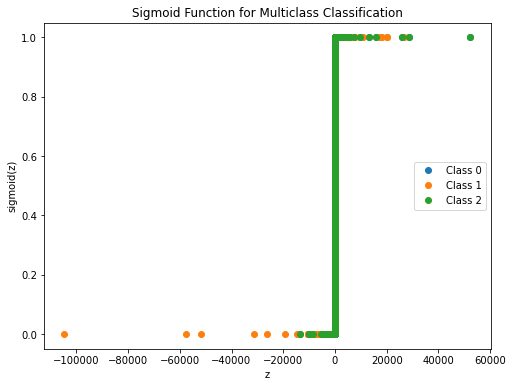

In [234]:
plt.figure(figsize=(8, 6))
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot the sigmoid function for each binary classifier
for class_index in range(3):
    # Predict the class scores for each sample
    z = clf_log.decision_function(X)[:, class_index]
    y_prob = sigmoid(z)
    
    # Plot the sigmoid function
    plt.plot(z, y_prob, 'o', label='Class {0}'.format(class_index))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function for Multiclass Classification')
plt.legend(loc="center right")
plt.show()

### Evaluate the Performance

[[2142  198    1]
 [   0 4782    0]
 [ 201   28    0]]


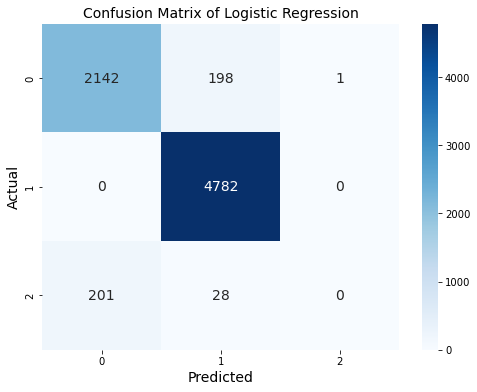

In [240]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_log = clf_log.predict(X_test)

# Calculate the confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Print the confusion matrix
print(conf_matrix_log)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of Logistic Regression', fontsize = 14)

# Show the plot
plt.show()

### Classification Report

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2341
           1       0.95      1.00      0.98      4782
           2       0.00      0.00      0.00       229

    accuracy                           0.94      7352
   macro avg       0.62      0.64      0.63      7352
weighted avg       0.91      0.94      0.93      7352



### Plot the ROC curve

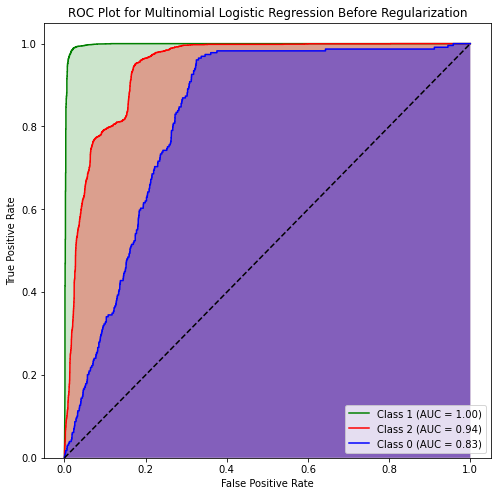

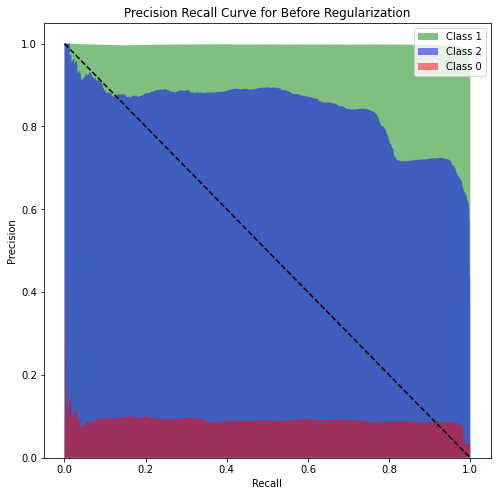

In [303]:
# Make predictions on the test data
y_pred_log_proba = clf_log.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_log_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_log_proba[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_log_proba[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Multinomial Logistic Regression Before Regularization')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_log_proba[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_log_proba[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_log_proba[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Before Regularization')
plt.show()

### Perform the VIF to determine the multicolinearity

In [236]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_with_constant = sm.add_constant(X_train)

vif = [variance_inflation_factor(X_train_with_constant.values, i) for i in range(X_train_with_constant.shape[1])]
vif_df = pd.DataFrame({'Variable': X_train_with_constant.columns, 'VIF': vif})
print("VIF:")
print(vif_df)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF:
                               Variable       VIF
0                                 const  0.000000
1                         backers_count  1.194311
2                          day_duration  1.082926
3                                  goal  1.006445
4                               pledged  1.094208
5         project_category_Architecture       inf
6                project_category_Audio       inf
7                project_category_Bacon       inf
8         project_category_Civic Design       inf
9               project_category_Comedy       inf
10   project_category_Community Gardens       inf
11           project_category_Cookbooks       inf
12              project_category_Design       inf
13              project_category_Drinks       inf
14              project_category_Events       inf
15    project_category_Farmer's Markets       inf
16               project_category_Farms       inf
17             project_category_Fiction       inf
18                project_category_Food      

Noted: We can see that our dataset contains many multicollinearity since we used one-hot-encoding

### Perform Regularization to resolve multicollinearity

L1 Regularization

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Train the logistic regression classifier
clf_log_lasso = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr')
clf_log_lasso.fit(X_train, y_train)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')

### Plot the ROC Curve

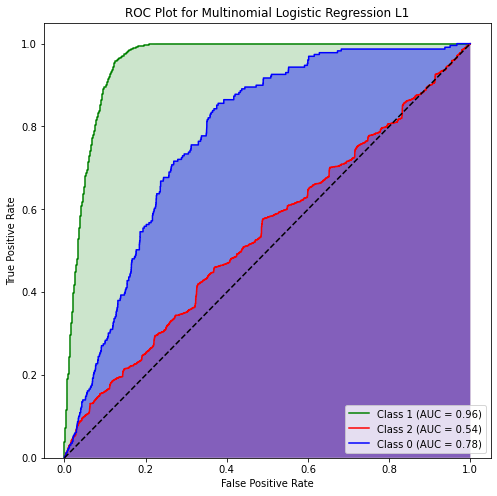

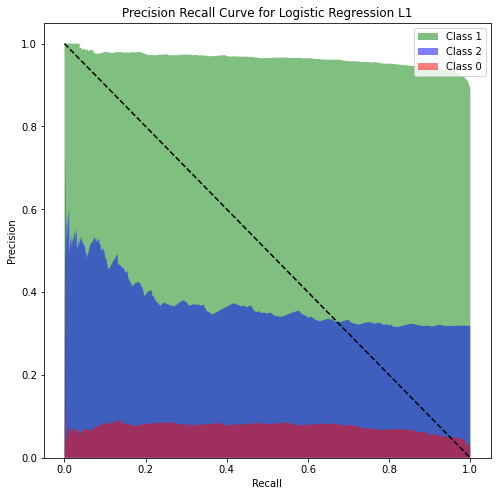

In [310]:
# Make predictions on the test data
y_pred_lasso_proba = clf_log_lasso.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_lasso_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_lasso_proba[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_lasso_proba[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Multinomial Logistic Regression L1')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_lasso_proba[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_lasso_proba[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_lasso_proba[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Logistic Regression L1')
plt.show()

[[2142  198    1]
 [   0 4782    0]
 [ 201   28    0]]


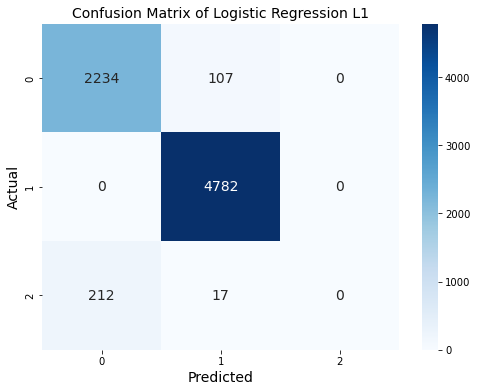

In [249]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_log_lasso = clf_log_lasso.predict(X_test)

# Calculate the confusion matrix
conf_matrix_log_lasso = confusion_matrix(y_test, y_pred_log_lasso)

# Print the confusion matrix
print(conf_matrix_log)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_lasso, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of Logistic Regression L1', fontsize = 14)

# Show the plot
plt.show()

In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log_lasso))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2341
           1       0.97      1.00      0.99      4782
           2       0.00      0.00      0.00       229

    accuracy                           0.95      7352
   macro avg       0.63      0.65      0.64      7352
weighted avg       0.92      0.95      0.94      7352



/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


L2 Regularization

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Train the logistic regression classifier
clf_log_ridge = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial')
clf_log_ridge.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

### Plot the ROC Curve

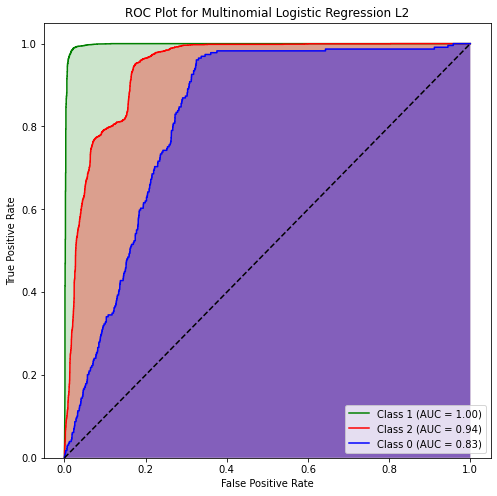

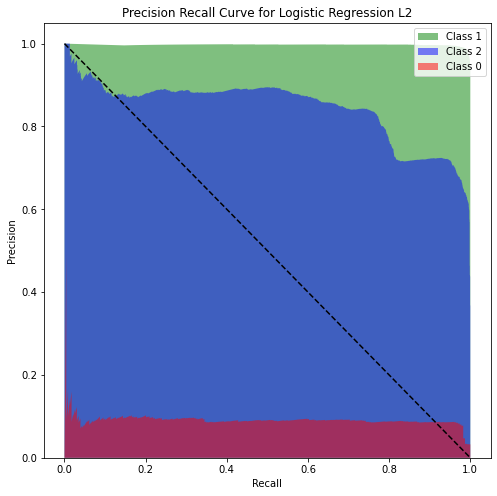

In [305]:
# Make predictions on the test data
y_pred_ridge_proba = clf_log_ridge.predict_proba(X_test)

# Get the unique classes in the target variable
classes = data['state'].unique()

plt.figure(figsize=(8, 8))
# Class 1
fpr, tpr, _ = roc_curve(y_test == classes[1], y_pred_ridge_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})', color="green")
plt.stackplot(fpr,tpr, colors="green", alpha=0.2 )

# Class 0
fpr, tpr, _ = roc_curve(y_test == classes[2], y_pred_ridge_proba[:, 2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 2 (AUC = {roc_auc:.2f})', color="red")
plt.stackplot(fpr,tpr, colors="red", alpha=0.3 )

# Class 2
fpr, tpr, _ = roc_curve(y_test == classes[0], y_pred_ridge_proba[:, 0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Class 0 (AUC = {roc_auc:.2f})', color="blue")
plt.stackplot(fpr,tpr, colors="blue", alpha=0.4 )

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for Multinomial Logistic Regression L2')
plt.legend()
plt.show() 

plt.figure(figsize=(8, 8))
precision, recall, thresholds = precision_recall_curve(y_test == classes[1], y_pred_ridge_proba[:, 1])
plt.stackplot(recall,precision, labels=[f"Class 1"], colors="green", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[2], y_pred_ridge_proba[:, 2])
plt.stackplot(recall,precision, labels=[f"Class 2"], colors="blue", alpha=0.5 )
precision, recall, thresholds = precision_recall_curve(y_test == classes[0], y_pred_ridge_proba[:, 0])
plt.stackplot(recall,precision, labels=[f"Class 0"], colors="red", alpha=0.5 )

plt.plot([0, 1], [1, 0], color='black', linestyle='--')
plt.xlabel("Recall"),plt.ylabel("Precision"),plt.legend(),plt.title('Precision Recall Curve for Logistic Regression L2')
plt.show()

[[2142  198    1]
 [   0 4782    0]
 [ 201   28    0]]


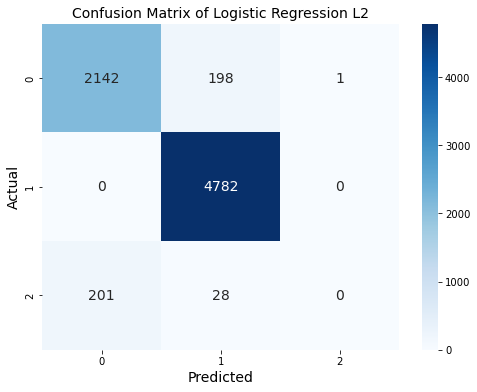

In [243]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred_log_ridge = clf_log_ridge.predict(X_test)

# Calculate the confusion matrix
conf_matrix_log_ridge = confusion_matrix(y_test, y_pred_log_ridge)

# Print the confusion matrix
print(conf_matrix_log)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})

# Add labels and title
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix of Logistic Regression L2', fontsize = 14)

# Show the plot
plt.show()

In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log_ridge))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2341
           1       0.95      1.00      0.98      4782
           2       0.00      0.00      0.00       229

    accuracy                           0.94      7352
   macro avg       0.62      0.64      0.63      7352
weighted avg       0.91      0.94      0.93      7352

